# PCA and KernelPCA
Here is the implementation of PCA and KPCA using PyOD and Scikit-learn for Anomaly Detection


```
References PCA,KPCA: 
1. Hoffman, Kernel PCA as Novelty Detecion: https://www.sciencedirect.com/science/article/abs/pii/S0031320306003414
2. http://videolectures.net/ecmlpkdd08_lazarevic_dmfa/
3. http://videolectures.net/kdd2010_krogel_odt/
4. https://pyod.readthedocs.io/en/latest/
5. https://scikit-learn.org/stable/
6. https://github.com/Nmerrillvt/kPCA
7. https://github.com/Quantumgunhee/VQOCC
8. https://github.com/GuansongPang/ADRepository-Anomaly-detection-datasets/tree/main
9. https://www.heikohoffmann.de/kpca.html

DATASETS:
1. Iris
2. Vowel
3. Breast Cancer

```

# <font color='white'> Import **Libraries**</font>

In [517]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
from numpy import reshape
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
!pip install -q pandas-profiling
from pandas_profiling import ProfileReport

!pip install -q pyod            # Install PyOD. The PyOD library provides several outlier detection methods that can be used
#!pip install --upgrade pyod  # or update if needed
from pyod.models.pca import PCA as PCA_PYOD
from pyod.models.kpca import KPCA as KPCA_PYOD

from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, precision_recall_curve, classification_report, roc_curve, auc, roc_auc_score

from keras.datasets import mnist
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# <font color='white'> Load **Datasets**</font>

## PATH to Drive

In [518]:
# For working in google_colab
from google.colab import drive
drive.mount('/content/drive')

# Add the folder to your google drive account to run it and change the directory path.
# You can also add Datasets to try it.
# LINK of Datasets: https://drive.google.com/drive/folders/12K1jIqNfU_yVOSdn_pqOX9kIVAgLRFPg?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [456]:
# Save all datasets
directory_path = "/content/drive/MyDrive/KPCA_PCA/datasets/"
output_path = "/content/drive/MyDrive/KPCA_PCA/output/"
dataset_ex = ['.csv', '.data', '.mat', '.xls' ]
all_datasets = [f for f in os.listdir(directory_path) if ( f.endswith('.data') or f.endswith('.csv') or f.endswith('.mat') or f.endswith('.xls')) and f not in dataset_ex]


In [457]:
all_datasets

['HTRU_2.csv',
 'lymphography.data',
 'musk.mat',
 'cardio.mat',
 'mnist.mat',
 'bupa.data',
 'badges.data',
 'vowel-context.data',
 'arrhythmia.data',
 'doccc.xls',
 'cancer.csv',
 'annthyroid_21feat_normalised.csv']

## <font color='white'> 1. <font color='yellow'>Iris</font></font>

In [458]:
iris = load_iris()

In [459]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [460]:
profile = ProfileReport(iris_df, title="Vowel Data Report")
# profile

In [461]:
iris_df['target'] = iris.target

In [462]:
iris_df = iris_df.drop_duplicates()

In [463]:
iris_df.reset_index(drop=True, inplace=True)

In [464]:
iris_df.target.unique()

array([0, 1, 2])

In [465]:
iris_df.target.value_counts()

0    50
1    50
2    49
Name: target, dtype: int64

## <font color='white'> 2. <font color='orange'> Vowel</font></font>

In [466]:
vowel = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/vowel/vowel-context.data'

In [467]:
vowel_data = pd.read_csv(vowel,skiprows=2, index_col=False,delim_whitespace=True)
vowel_data.columns = ['feature{}'.format(i) for i in range(0,vowel_data.shape[1])]

vowel_data.shape,vowel_data.nunique().tolist()[-1:]

((987, 14), [11])

In [468]:
profile = ProfileReport(vowel_data, title="Vowel Data Report")

In [469]:
# profile

In [470]:
vowel_data.feature13.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2])

In [471]:
vowel_data.feature13.value_counts()

3     90
4     90
5     90
6     90
7     90
8     90
9     90
10    90
0     89
1     89
2     89
Name: feature13, dtype: int64

In [472]:
vowel1_dataset = vowel_data.copy()
vowel1_dataset['feature13']= (vowel1_dataset['feature13']==1)
vowel1_dataset = vowel1_dataset.drop(vowel1_dataset[vowel1_dataset['feature13'] == False].sample(frac=0.96).index)
vowel1_dataset.shape

(125, 14)

In [473]:
vowel1_dataset.feature13.unique()

array([False,  True])

In [474]:
counts_v = vowel1_dataset.feature13.value_counts()
counts_v

True     89
False    36
Name: feature13, dtype: int64

## <font color='white'> 3. <font color='red'> Breast Cancer</font></font>

In [475]:
breast_cancer = load_breast_cancer()
bc_target = breast_cancer.target
# Real Contamination
contamination = sum(bc_target) / len(bc_target)
print("Contamination is:", contamination)

Contamination is: 0.6274165202108963


In [476]:
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

In [477]:
breast_cancer_df.shape

(569, 30)

In [478]:
profile = ProfileReport(breast_cancer_df, title="Breast Cancer Data Report")

In [479]:
# profile.to_file(output_file=output_path+"breast_cancer.html") 
# # or
# profile

In [480]:
breast_cancer_df["target"] = bc_target

In [481]:
breast_cancer_df.target.unique()

array([0, 1])

In [482]:
breast_cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

# <font color='white'> Define **functions** </font>

## **Outlier Detection** based on PyOD library and Hoffman's Novelty Detection

FUNCTIONS PyOD:  PCA & Kernel-PCA Outlier Detection:
Train the model with normal and abnormal data. Then trying a test set and  making decision if it is outlier or not based on Hoffmans Paper for Novelty Detection and PyOD documentation.

In [483]:
def pca_kpca_with_metrics(model, X_train, y_train, X_test, y_test, contamination=0.1,
                            kernel='rbf', gamma=0.1, degree=3, coef0=1):

  if model=='pca':
    # Fit the model
    model_ad = PCA_PYOD(n_components=None, contamination=contamination)
    model_ad.fit(X_train,y=None)

    n_components = model_ad.n_components_
    components = model_ad.components_

    print("The non-0s PCA components are: ",n_components)
    # print("The components: \n", components)

    # exp_var = model_ad.explained_variance_
    exp_var_rat = model_ad.explained_variance_ratio_

    plot_explained_variance(exp_var_rat)
    n_components = explained_variance_threshold(exp_var_rat, n_components)

    model_ad = PCA_PYOD(n_components=n_components, contamination=contamination)
  else: 
    if model=='kpca':
      n_components=2
      model_ad = KPCA_PYOD(n_components=n_components, kernel=kernel, gamma=gamma, degree=degree, coef0=coef0, contamination=contamination)   
    else:
      print("wrong input model")
      return
  
  model_ad.fit(X_train,y=None)

  threshold_model_ad = model_ad.threshold_
  print("The threshold of the PCA method for the given contamination rate:" , threshold_model_ad)

  y_train_pred = model_ad.predict(X_train)
  y_train_scores= model_ad.decision_function(X_train)

  y_test_pred = model_ad.predict(X_test) # outlier labels (0 or 1)
  y_test_scores = model_ad.decision_function(X_test) #outlier scores

  print("\nTrain-set with the threshold:\n")
  plot_anomalies_with_threshold(y_train_scores, threshold_model_ad)
  print("Another option to choose better threshold from the above plot.\nThen run again for other contamination for better results.\n")
  print("\nTest-set with the threshold:\n")
  plot_anomalies_with_threshold(y_test_scores, threshold_model_ad)

  print(descriptive_stat_threshold(X_train, y_train_scores, threshold_model_ad))
  print("\n")
  print(descriptive_stat_threshold(X_test, y_test_scores, threshold_model_ad))
  print("\n")

  y_test_prob = model_ad.predict_proba(X_test, method='linear', return_confidence=False)[:, 1]

  calculate_metrics(y_test, y_test_scores, y_test_pred)

  print(evaluate_print('\nFor test data:', y_test, y_test_scores))

# Function to plot the explained variance ratio
def plot_explained_variance(exp_var_ratio):

  end = len(exp_var_ratio)+1
  plt.figure(figsize=(9, 6))
  plt.plot(range(1, end), exp_var_ratio*100)
  plt.xlabel('Principal Component ')
  plt.ylabel('Explained Variance percentage (%)')
  plt.xticks(range(1, end))
  plt.show()

# Function to plot the explained variance ratio with the selected cumulative %
def explained_variance_threshold(exp_var_ratio, number_components):

  cum_exp_var = np.cumsum(exp_var_ratio) * 100
  end = number_components+1
  plt.bar(range(1, end), exp_var_ratio * 100, align='center', label='Individual explained variance')
  plt.step(range(1, end), cum_exp_var, where='mid', label='Cumulative explained variance', color='red')
  plt.axhline(y=90, color='gray', linestyle='--', linewidth=1)
  plt.text(end, 90, '90%', color='gray', fontsize=10, va='center')
  plt.ylabel('Explained variance percentage (%)')
  plt.xlabel('Principal component')
  plt.legend(loc='best')
  plt.xticks(ticks=range(1, end))
  plt.tight_layout()
  plt.show()
  # The number of components with the pre-selected % of cumulative %
  # Maybe it is better to increase it to 95% instead of 90%
  number_components = np.where(cum_exp_var > 90)[0][0] + 1
  print("Number of principal components needed to explain 90% of variance:", number_components)

  # Returns the number of components
  return number_components

# Function that plots the histogram of anomaly scores of the test-set with the threshold
def plot_anomalies_with_threshold(y_scores, threshold):

  plt.hist(y_scores, bins=50) 
  plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2)
  plt.text(threshold, max([list(y_scores).count(x) for x in set(y_scores)]),'Threshold', color='red', fontsize=10, va='center')
  plt.title("Histogram with the threshold")
  plt.xlabel('Anomaly score')
  plt.show()
  print("\n")

# Function that gives a table with statistics about the given test-set (Anomaly scores, Avg, count, count%)
def descriptive_stat_threshold(df, pred_score, threshold):

  df = pd.DataFrame(df)
  df['Anomaly_Score'] = pred_score
  df['Group'] = np.where(df['Anomaly_Score']<= threshold, 'Normal', 'Novelty')

  cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
  cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
  stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
  stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
  return (stat)

# Function to plot the Confussion matrix for the given test-set
def conf_matrix(y_true, y_pred, labels=None, title='Confusion Matrix'):

  cm = confusion_matrix(y_true, y_pred, labels=labels)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(8, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
  ax.set_title(title)
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')
  plt.show()
  return cm

# Function that plots the RocCurve for the given test-set
def roccurve(y_true, y_scores):

  fpr, tpr, thresholds = roc_curve(y_true, y_scores)
  auc_score = auc(fpr, tpr)
  plt.figure(figsize=(9, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()
  print("\n")

# Function that Prints and plots a lot of Metrics
def calculate_metrics(y_true, pred_scores, y_pred):

  # Confusion matrix
  print('Confusion Matrix:\n')
  cm = conf_matrix(y_true, y_pred)
  tn, fp, fn, tp = cm.ravel()
      
  # Calculate the AUC-ROC
  auc_roc = roc_auc_score(y_true, pred_scores)
  
  # ROC_Curve
  roccurve(y_true, pred_scores)

  accuracy = (tp+tn)/(tp+fp+tn+fn)
  print("Accuracy: ", accuracy)

  precision = (tp)/(tp+fp)
  print("Precision: ", precision)

  recall = (tp)/(tp+fn)
  print("Recall: ", recall)

  f1score = 2*(precision*recall)/(precision+recall)
  print("F1 Score: ", f1score)

  print(f'AUC-ROC: {auc_roc:.4f}')


## **Novelty Detection**

Train the model with inliers

In [484]:
# TODO: A better decision for PCA method, the KernelPCA method is base on Hoffmans Novelty detection

def function_AD(model, 
                X_train, y_train, X_test, y_test, 
                n_components=None, 
                kernel='rbf', 
                gamma=None, 
                degree=3, 
                coef0=1, 
                contamination=0, 
                outlier=0,
                analysis=False):
  
  # Selection between PCA and KernelPCA
  if model=='pca':

    model_ad = PCA(n_components=None)                                         # Create the model for PCA
    model_ad.fit(X_train,y=None)                                              # Fit the model with the given train-set (the model should contain only the normal class)
    n_components = model_ad.n_components_                                     # The total number of components (For PCA are the number of the features)
    print("The non-0s PCA components are: \n",n_components)
    components = model_ad.components_                                         # The components
    exp_var = model_ad.explained_variance_                                    # Here is the explained variance for each componant
    exp_var_rat = model_ad.explained_variance_ratio_                          # Here is the explained variance ratio for each componant


    plot_explained_variance_AD(exp_var_rat)                                      # Here is the explained variance for each component
    n_components = explained_variance_threshold_AD(exp_var_rat, n_components)    # Select the components tha discribe the 90% of cumulative explained_variance

    # Re-fit the model with the selected components
    if n_components == 1: n_components = 2
    model_ad = PCA(n_components=n_components)

  else: 
    if model=='kpca':
      # TODO: The selected components for kpca is 2, but we can try a gridsearch in order to distinguish which number of components is better
      n_components=2

      
      model_ad = KernelPCA(n_components=n_components, kernel=kernel,          # Create the model
                           gamma=gamma, degree=degree, coef0=coef0, fit_inverse_transform=True)
    else:
      print("The model you can use are PCA and KernelPCA as: pca or kpca respectively")
      return

  # Fit the model with the X_train and transforming the X_train into the selected number of components and then reconstructed.
  X_train_reconstructed = model_ad.inverse_transform(model_ad.fit_transform(X_train))
  
  # Reduce and reconstruct the test-data back to its original 
  X_test_reduced = model_ad.transform(X_test)
  X_test_reconstructed = model_ad.inverse_transform(X_test_reduced)

  # Get the reconstruction Errors
  rec_errors_test = reconstruction_errors_AD(X_test, X_test_reconstructed)
  rec_errors_train = reconstruction_errors_AD(X_train, X_train_reconstructed)

  # Calculate the Novelty Scores 
  anom_scores = anomaly_scores_AD(rec_errors_train, rec_errors_test)

  # Threshold
  threshold = threshold_ratio_AD(X_train, y_test, rec_errors_train, outlier=outlier, contamination=contamination, anom_scores = anom_scores)

  # Classify the test data as normal or anomalous based on the reconstruction error and the selected threshold
  y_pred = [1 if e > threshold else 0 for e in rec_errors_test]

  if model=='pca' or analysis==False:

    # Plot the score of anomalies and the threshold
    plot_anomalies_with_threshold_AD(anom_scores, threshold)

    # Plot the true normal classes of the selected X_train into two Principal Components of the transformed Data
    plt.figure(figsize=(7, 6))
    plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('The first 2 PC of the true test-set')
    plt.show()

    # Plot the predicted normals and the predicted anomalies of the selected X_test into two Principal Components of the transformed Data
    plt.figure(figsize=(7, 6))
    plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('The first 2 PC of the predicted test-set')
    plt.show()

    # Print informations about the given test-set
    descriptive_stat_threshold_AD(X_test, anom_scores, threshold)
    
    # Print and Plot all the Metrics
    calculate_metrics_AD(X_test, y_test, anom_scores, y_pred) 
    print(f1_score(y_test, y_pred))
  else:
    return roc_auc_score(y_test, anom_scores), f1_score(y_test, y_pred)


    
# Function that calculates the reconstruction errors
def reconstruction_errors_AD(X, X_reconstructed):
  # Calculate the reconstruction error for each data point
  reconstruction_errors = np.mean((X - X_reconstructed) ** 2, axis=1)
  return reconstruction_errors

# Functions that returns the anomaly scores
def anomaly_scores_AD(reconstruction_errors_train, reconstruction_errors_test):
  # Calculate the Novelty Scores for each data point of the test-set
  mean_error = np.mean(reconstruction_errors_train)
  std_error = np.std(reconstruction_errors_train)
  normalized_error_test = (reconstruction_errors_test - mean_error) / std_error
  return np.abs(normalized_error_test)

# Function that returns the threshold
# Here I am not sure if is the correct way but we can find the best threshold for having the best F-1 score if the contamination=0. 
# Otherwise we can set it based a given threshold or as a contamination (% of outliers or anomalies in the test set)
def threshold_ratio_AD(X_train, y_true, reconstruction_errors, outlier=0, contamination=0, anom_scores = 0):
  if contamination==-1:

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_true, anom_scores)

    # Calculate the F1 score for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall)
       
    # Find the index of the threshold that maximizes the F1 score
    optimal_idx = np.argmax(f1_scores)
       
    # Get the optimal threshold
    optimal_threshold = thresholds[optimal_idx]
    print("The optimum threshold of the PCA method:", optimal_threshold)
    threshold = optimal_threshold

  elif contamination==0:
    mean_error = np.mean(reconstruction_errors)
    std_error = np.std(reconstruction_errors)
    normalized_error = (reconstruction_errors - mean_error) / std_error
    threshold = mean_error + 2.5 * std_error

  elif contamination>0 and contamination<0.5:
    serr = np.sort(reconstruction_errors)
    threshold = serr[X_train.shape[0]-outlier]

  else:
    print("Not correct contamination ratio")

  return threshold

# Function to plot the explained variance ratio
def plot_explained_variance_AD(exp_var_ratio):

  end = len(exp_var_ratio)+1
  plt.figure(figsize=(9, 6))
  plt.plot(range(1, end), exp_var_ratio*100)
  plt.xlabel('Principal Component ')
  plt.ylabel('Explained Variance percentage (%)')
  plt.xticks(range(1, end))
  plt.show()

# Function to plot the explained variance ratio with the selected cumulative %
def explained_variance_threshold_AD(exp_var_ratio, number_components):

  cum_exp_var = np.cumsum(exp_var_ratio) * 100
  end = number_components+1
  plt.bar(range(1, end), exp_var_ratio * 100, align='center', label='Individual explained variance')
  plt.step(range(1, end), cum_exp_var, where='mid', label='Cumulative explained variance', color='red')
  plt.axhline(y=90, color='gray', linestyle='--', linewidth=1)
  plt.text(end, 90, '90%', color='gray', fontsize=10, va='center')
  plt.ylabel('Explained variance percentage (%)')
  plt.xlabel('Principal component')
  plt.legend(loc='best')
  plt.xticks(ticks=range(1, end))
  plt.tight_layout()
  plt.show()
  # The number of components with the pre-selected % of cumulative %
  # Maybe it is better to increase it to 95% instead of 90%
  number_components = np.where(cum_exp_var > 90)[0][0] + 1
  print("Number of principal components needed to explain 90% of variance:", number_components)

  # Returns the number of components
  return number_components

# Function that plots the histogram of anomaly scores of the test-set with the threshold
def plot_anomalies_with_threshold_AD(y_scores, threshold):

  plt.hist(y_scores, bins=50) 
  plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2)
  plt.text(threshold, max([list(y_scores).count(x) for x in set(y_scores)]),'Threshold', color='red', fontsize=10, va='center')
  plt.title("Histogram with the threshold")
  plt.xlabel('Anomaly score')
  plt.show()
  print("\n")

# Function that gives a table with statistics about the given test-set (Anomaly scores, Avg, count, count%)
def descriptive_stat_threshold_AD(df, pred_score, threshold):

  df = pd.DataFrame(df)
  df['Anomaly_Score'] = pred_score
  df['Group'] = np.where(df['Anomaly_Score']<= threshold, 'Normal', 'Novelty')

  cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
  cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
  stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
  stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
  return (stat)

# Function to plot the Confussion matrix for the given test-set
def conf_matrix_AD(y_true, y_pred, labels=None, title='Confusion Matrix'):

  cm = confusion_matrix(y_true, y_pred, labels=labels)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(7, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')
  ax.set_title(title)
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')
  plt.show()
  return cm

# Function that plots the RocCurve for the given test-set
def roccurve_AD(y_true, y_scores):

  fpr, tpr, thresholds = roc_curve(y_true, y_scores)
  auc_score = auc(fpr, tpr)
  plt.figure(figsize=(7, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()
  print("\n")

# Function that Prints and plots a lot of Metrics
def calculate_metrics_AD(X_true, y_true, pred_scores, y_pred):

  # Confusion matrix
  print('Confusion Matrix:\n')
  cm = conf_matrix_AD(y_true, y_pred)
      
  # Calculate the AUC-ROC
  auc_roc = roc_auc_score(y_true, pred_scores)
  
  # ROC_Curve
  roccurve_AD(y_true, pred_scores)

  # Calculate the accuracy
  accuracy = accuracy_score(y_true, y_pred)

  # Calculate the precision
  precision = precision_score(y_true, y_pred)

  # Calculate the recall
  recall = recall_score(y_true, y_pred)

  # Calculate the F1 score
  f1 = f1_score(y_true, y_pred)

  # Print the results
  print(f'AUC-ROC: {auc_roc:.4f}')
  print(f'Accuracy: {accuracy:.4f}')
  print(f'F1 Score: {f1:.4f}')
  print(f'Precision: {precision:.4f}')
  print(f'Recall: {recall:.4f}')

  #return cm, auc_roc, accuracy, f1, precision, recall
def split_data(X, y, chosen_class, percentage=0.8):
    if chosen_class not in np.unique(y):
        raise ValueError("Chosen class not found in the target variable.")
  
    # Filter X for the chosen class: y = class
    X_c = X[y == chosen_class]
    y_c = y[y == chosen_class]

    # Randomly shuffle the rows of X_c and y_c
    random_indices = np.random.permutation(len(X_c))
    X_c = X_c[random_indices]
    y_c = y_c[random_indices]

    # Split X_c and y_c into training and testing sets
    train_size = int(percentage * len(X_c))
    X_train = X_c[:train_size]
    y_train = y_c[:train_size]
    X_test_n = X_c[train_size:]
    y_test_n = y_c[train_size:]

    # Filter X for other classes: y != class
    X_new_a = X[y != chosen_class]
    y_new_a = y[y != chosen_class]

    # Randomly select rows from X_new_a and y_new_a to create X_test_a and y_test_a
    select = len(X_test_n)
    random_indices = np.random.choice(len(X_new_a), size=select, replace=False)
    X_test_a = X_new_a[random_indices]
    y_test_a = y_new_a[random_indices]

    # Combine X_test_n, X_test_a, y_test_n, and y_test_a to create X_test and y_test
    X_test = np.concatenate((X_test_n, X_test_a), axis=0)
    y_test = np.concatenate((y_test_n, y_test_a), axis=0)
    
    return X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a


## **Park's get the AUC with the mean of mse of each class.**

In [485]:
def split_data(X, y, chosen_class, percentage=0.8):
    if chosen_class not in np.unique(y):
        raise ValueError("Chosen class not found in the target variable.")
  
    # Filter X for the chosen class: y = class
    X_c = X[y == chosen_class]
    y_c = y[y == chosen_class]

    # Randomly shuffle the rows of X_c and y_c
    random_indices = np.random.permutation(len(X_c))
    X_c = X_c[random_indices]
    y_c = y_c[random_indices]

    # Split X_c and y_c into training and testing sets
    train_size = int(percentage * len(X_c))
    X_train = X_c[:train_size]
    y_train = y_c[:train_size]
    X_test_n = X_c[train_size:]
    y_test_n = y_c[train_size:]

    # Filter X for other classes: y != class
    X_new_a = X[y != chosen_class]
    y_new_a = y[y != chosen_class]

    # Randomly select rows from X_new_a and y_new_a to create X_test_a and y_test_a
    select = len(X_test_n)
    random_indices = np.random.choice(len(X_new_a), size=select, replace=False)
    X_test_a = X_new_a[random_indices]
    y_test_a = y_new_a[random_indices]

    # Combine X_test_n, X_test_a, y_test_n, and y_test_a to create X_test and y_test
    X_test = np.concatenate((X_test_n, X_test_a), axis=0)
    y_test = np.concatenate((y_test_n, y_test_a), axis=0)
    
    return X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a

def kernelpca_OCC(X_train, X_test_n, X_test_a, n_components=None, gamma=0.01, kernel="rbf", alpha=0.1):

  kernel_pca = KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma, fit_inverse_transform=True, alpha=alpha)
  kernel_pca.fit(X_train)

  X_train_reconstructed = kernel_pca.inverse_transform(kernel_pca.transform(X_train))
  X_test_n_reconstructed = kernel_pca.inverse_transform(kernel_pca.transform(X_test_n))
  X_test_a_reconstructed = kernel_pca.inverse_transform(kernel_pca.transform(X_test_a))

  n_mse = np.square(np.subtract(X_test_n,X_test_n_reconstructed)).mean(axis=1)
  a_mse = np.square(np.subtract(X_test_a,X_test_a_reconstructed)).mean(axis=1)

  return n_mse, a_mse

def AUC_OC(n_mse, a_mse):
  
  y_true = np.array([0]*len(n_mse)+[1]*len(a_mse))
  y_score = np.r_[n_mse,a_mse]

  fpr, tpr, _ = roc_curve(y_true, y_score)
  auc_measure = auc(fpr,tpr)

  return auc_measure


def Kernel_PCA_AUC(X, y, split_percentage=0.8, one_class=-1, kernel_analysis=False):
  # Get the unique classes
  all_classes = np.unique(y)
  print("\nAll different classes: ", all_classes)
  
  # Count the number of unique classes in y
  number_of_classes = len(all_classes)
  print("\nNumber of classes: ", number_of_classes)

  if (one_class==-1) or (one_class not in all_classes):
    # do for all classes
    for oc in range(number_of_classes):
      X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, oc, split_percentage)
      if kernel_analysis==False:
        n_mse, a_mse = kernelpca_OCC(X_train, X_test_n, X_test_a)
        auc = AUC_OC(n_mse, a_mse)
        print("\nFor the class: ", oc)
        print("\nAUC: ", auc)
      else:
        best_auc = 0.0
        ooptimum_gamma = 0
        for gamma in np.logspace(-10, 10, num=20, base=2):
          n_mse, a_mse = kernelpca_OCC(X_train, X_test_n, X_test_a, gamma=gamma)
          new_auc = AUC_OC(n_mse, a_mse)
          # print("\nFor the class: ", oc)
          # print("\n gamma: ", gamma)
          # print("\nAUC: ", new_auc)
          if new_auc > best_auc :
            best_auc = new_auc
            optimum_gamma = gamma
        print("=====================")
        print("\nFor the class: ", oc)
        print("\nOptimum gamma: ", optimum_gamma)
        print("\nBest AUC: ", best_auc)
        print("=====================")
  else:
      # do for the chosen 
      X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, one_class, split_percentage)
      if kernel_analysis==False:
        n_mse, a_mse = kernelpca_OCC(X_train, X_test_n, X_test_a)
        auc = AUC_OC(n_mse, a_mse)
        print("\nFor the class: ", one_class)
        print("\nAUC: ", auc)
      else:
        # do for the chosen 
        for gamma in np.logspace(-10, 1, num=10, base=2):
            n_mse, a_mse = kernelpca_OCC(X, y, split_percentage, one_class, gamma=gamma)
            new_auc = AUC_OC(n_mse, a_mse)
            print("\nFor the class: ", one_class)
            print("\n gamma: ", gamma)
            print("\nAUC: ", new_auc)
            if new_auc > best_auc :
              best_auc = new_auc
              optimum_gamma = gamma
        print("=====================")
        print("\nFor the class: ", one_class)
        print("\nOptimum gamma: ", optimum_gamma)
        print("\nBest AUC: ", best_auc)
        print("=====================")

# <font color='white'>Apply functions to **Datasets**</font>

## <font color='white'> 1. <font color='yellow'>**Iris</font> Dataset**</font>

### **SPLIT DATASET**

In [486]:
X = iris_df.iloc[:, :-1].values
y = iris_df['target'].values
X = scaler.fit_transform(X)

In [487]:
selected_class = 0
other_class = 1

# ONE VS ALL
# y = np.where(y == selected_class, 0, 1)

# ONE vs ONE
mask = np.logical_or(y == selected_class, y == other_class)
X = X[mask]
y = y[mask]
y = np.where(y == selected_class, 0, 1)

In [488]:
X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, 0, percentage=0.6)
# The created contamination for a model that we are going to train it only with normal chosen class
contamination = 0.00000001

###**ANOMALY DETECTION**

The non-0s PCA components are:  4


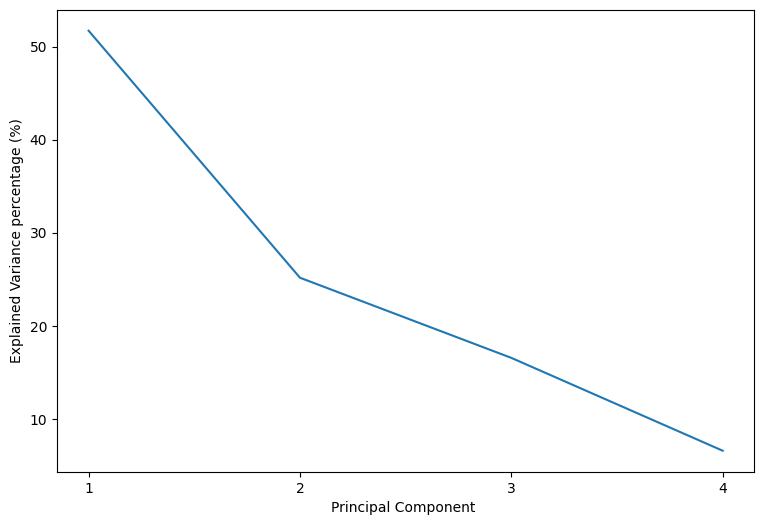

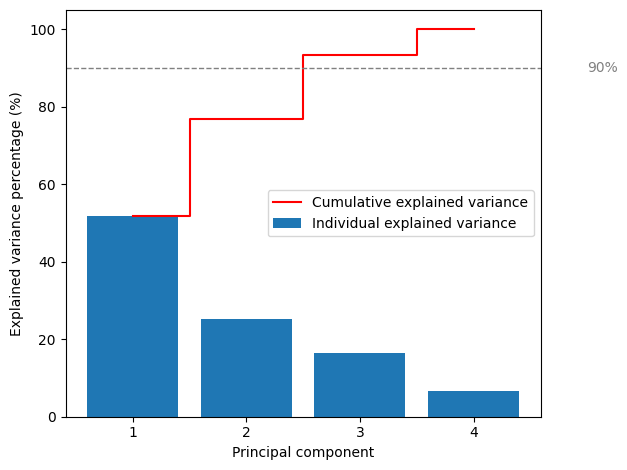

Number of principal components needed to explain 90% of variance: 3
The threshold of the PCA method for the given contamination rate: 41.5171724754581

Train-set with the threshold:



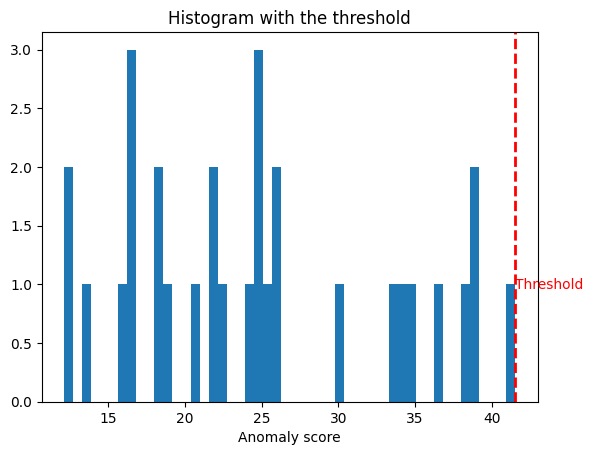



Another option to choose better threshold from the above plot.
Then run again for other contamination for better results.


Test-set with the threshold:



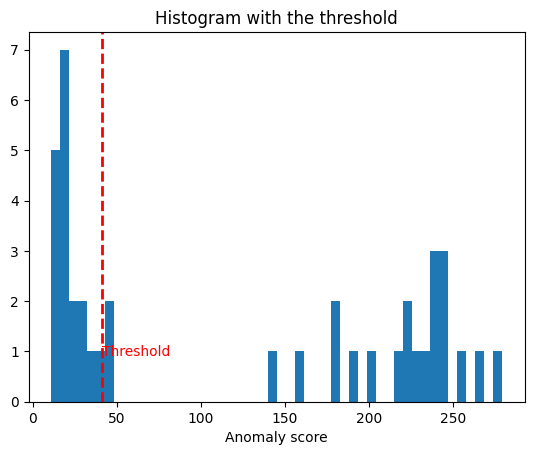



     Group  Count    Count %     0     1     2     3  Anomaly_Score
0   Normal     29  96.666667 -1.01  0.77 -1.28 -1.22          24.39
1  Novelty      1   3.333333 -1.86 -0.14 -1.50 -1.44          41.52


     Group  Count  Count %     0     1     2     3  Anomaly_Score
0   Normal     18     45.0 -1.07  0.82 -1.30 -1.29          20.81
1  Novelty     22     55.0  0.11 -0.48  0.16  0.07         205.41


Confusion Matrix:



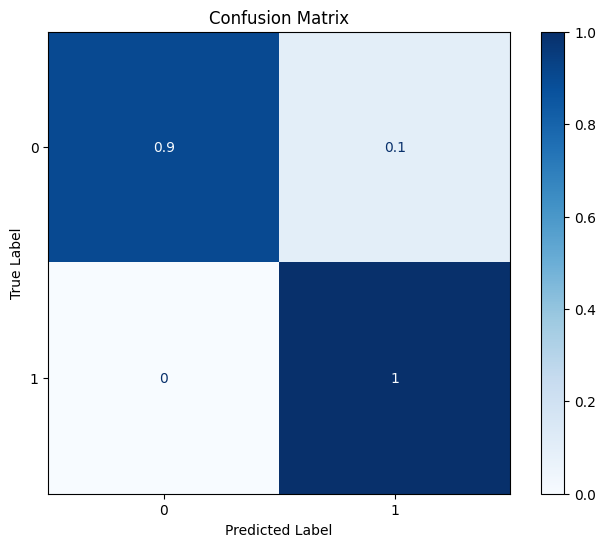

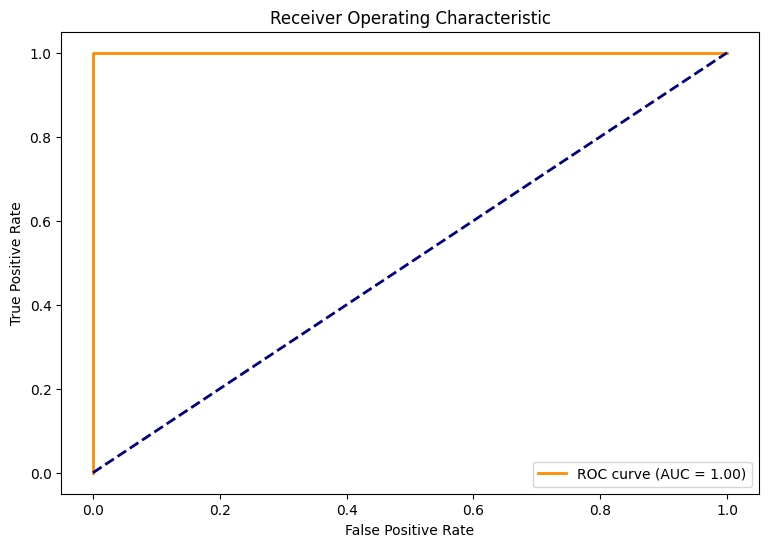



Accuracy:  0.95
Precision:  0.9090909090909091
Recall:  1.0
F1 Score:  0.9523809523809523
AUC-ROC: 1.0000

For test data: ROC:1.0, precision @ rank n:1.0
None


In [489]:
# PCA
pca_kpca_with_metrics('pca', X_train, y_train, X_test, y_test, contamination=contamination)

The threshold of the PCA method for the given contamination rate: 0.0484188139317881

Train-set with the threshold:



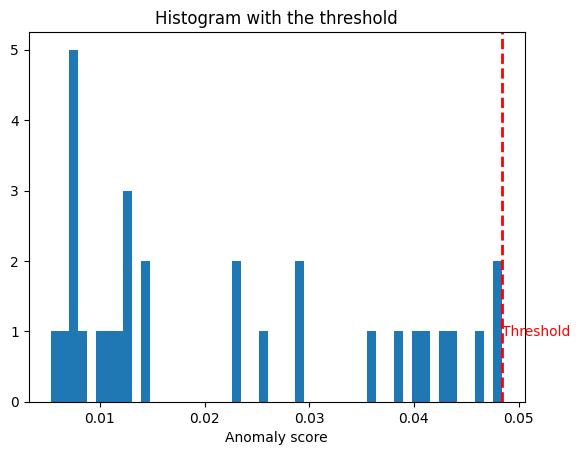



Another option to choose better threshold from the above plot.
Then run again for other contamination for better results.


Test-set with the threshold:



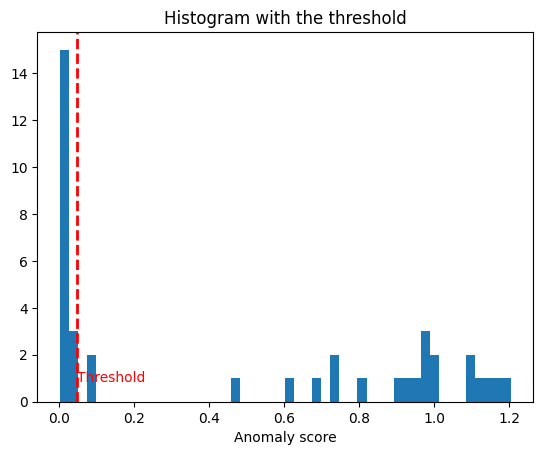



     Group  Count    Count %     0     1     2     3  Anomaly_Score
0   Normal     29  96.666667 -1.01  0.76 -1.29 -1.23           0.02
1  Novelty      1   3.333333 -1.74  0.32 -1.39 -1.31           0.05


     Group  Count  Count %     0     1     2     3  Anomaly_Score
0   Normal     18     45.0 -0.99  0.87 -1.30 -1.29           0.02
1  Novelty     22     55.0  0.04 -0.52  0.16  0.07           0.85


Confusion Matrix:



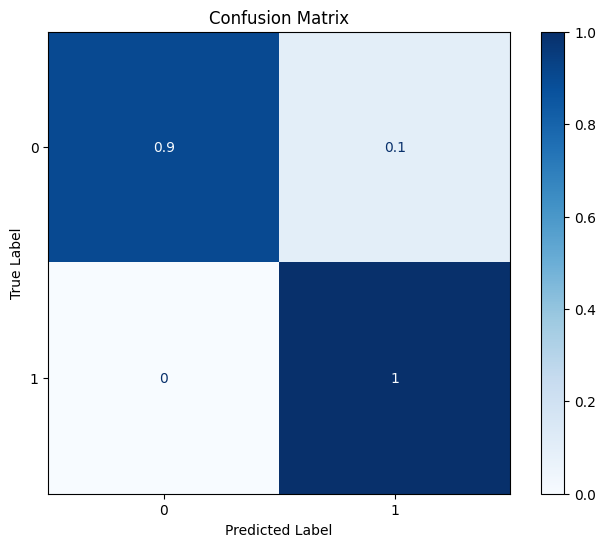

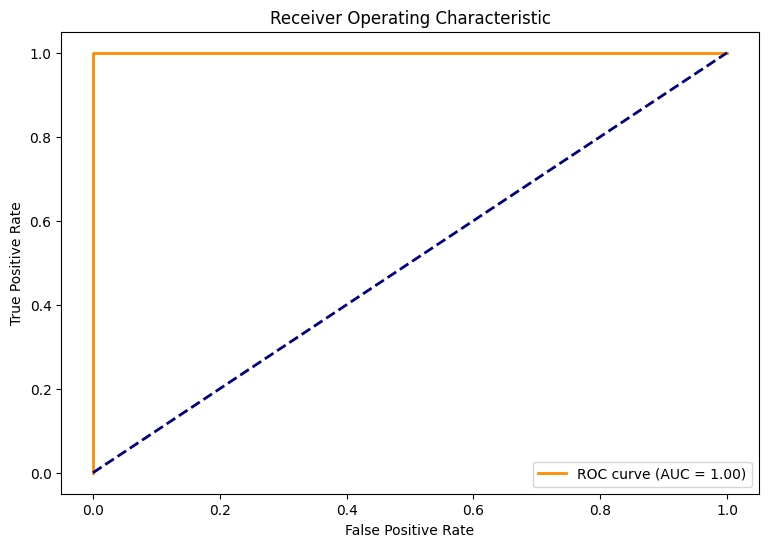



Accuracy:  0.95
Precision:  0.9090909090909091
Recall:  1.0
F1 Score:  0.9523809523809523
AUC-ROC: 1.0000

For test data: ROC:1.0, precision @ rank n:1.0
None


In [490]:
# KPCA
pca_kpca_with_metrics('kpca', X_train, y_train, X_test, y_test, contamination=contamination)

###**NOT_** NOVELTY DETECTION

The non-0s PCA components are: 
 4


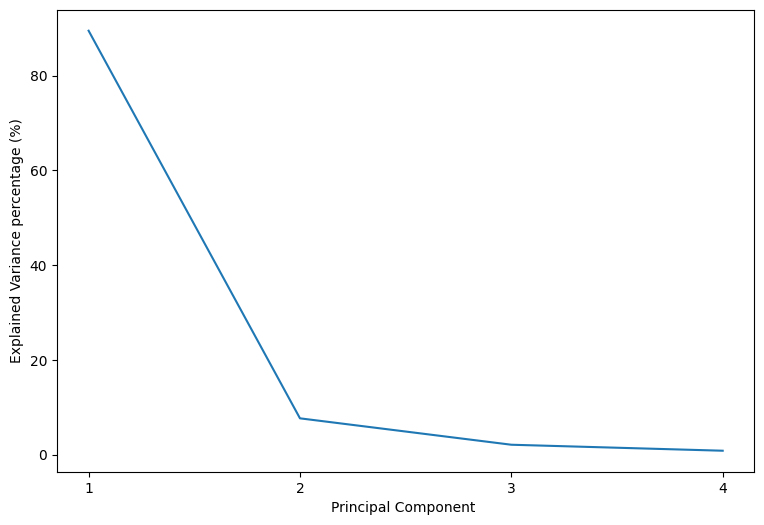

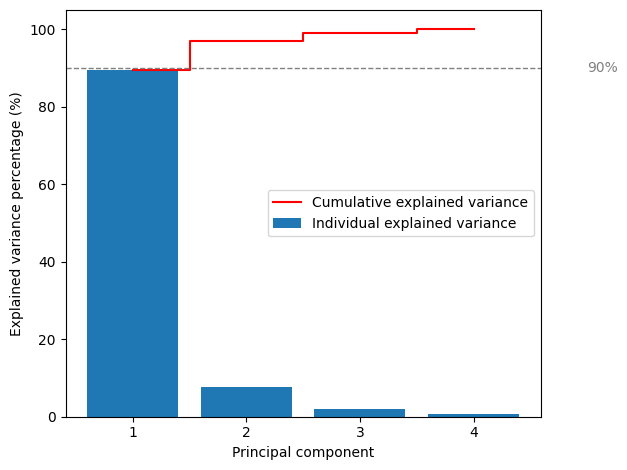

Number of principal components needed to explain 90% of variance: 2


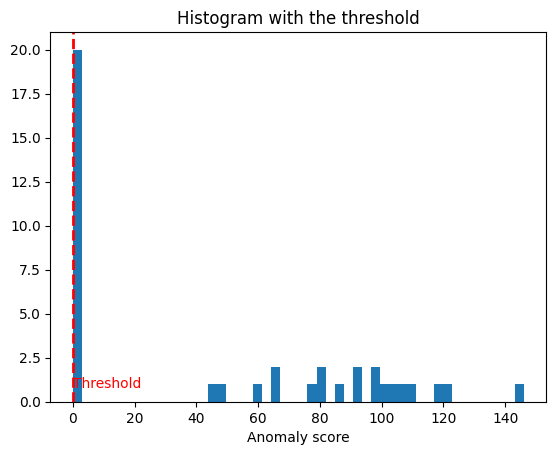

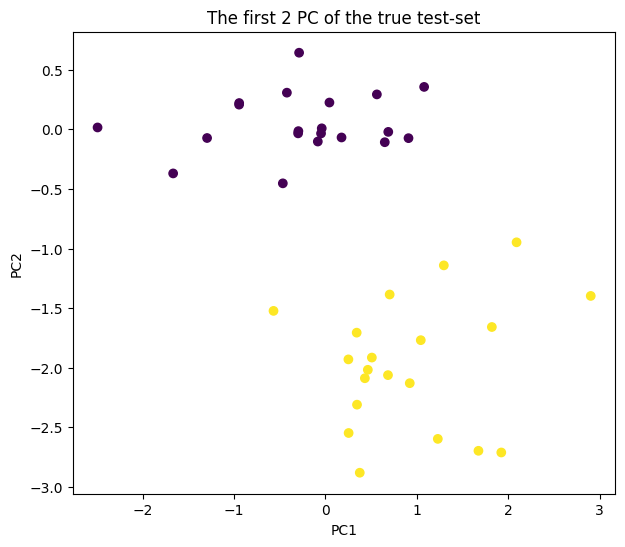

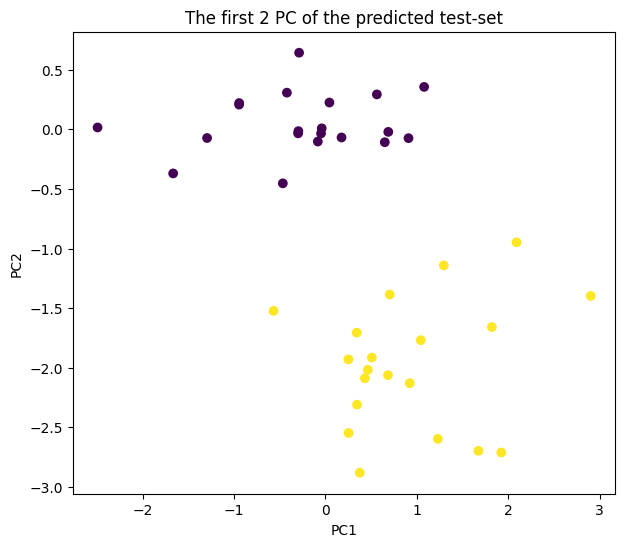

Confusion Matrix:



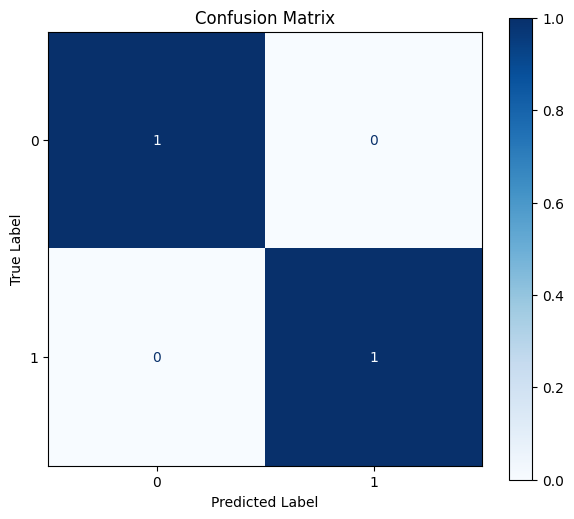

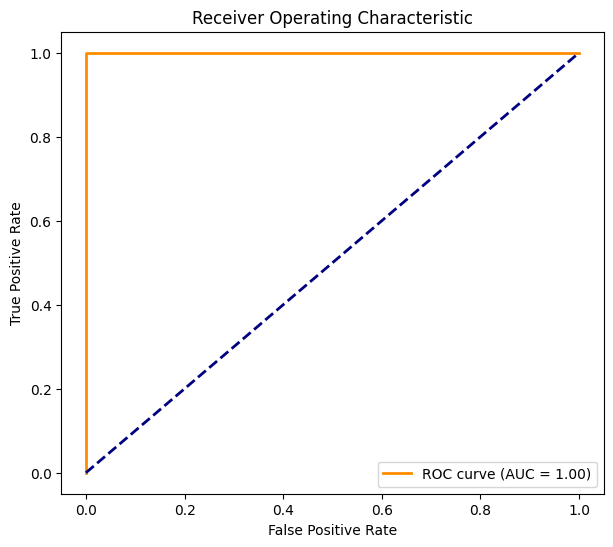



AUC-ROC: 1.0000
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
1.0


In [491]:
# PCA
function_AD('pca', X_train, y_train, X_test, y_test)

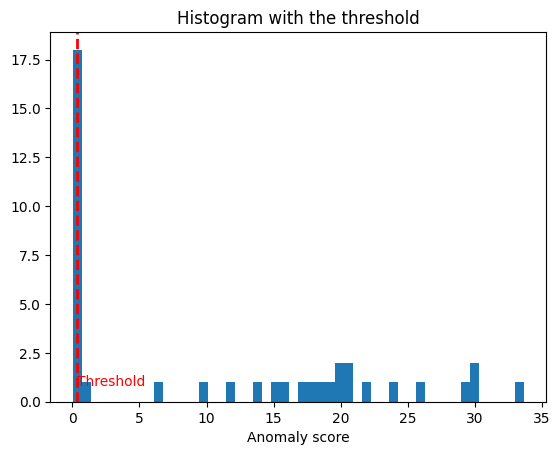

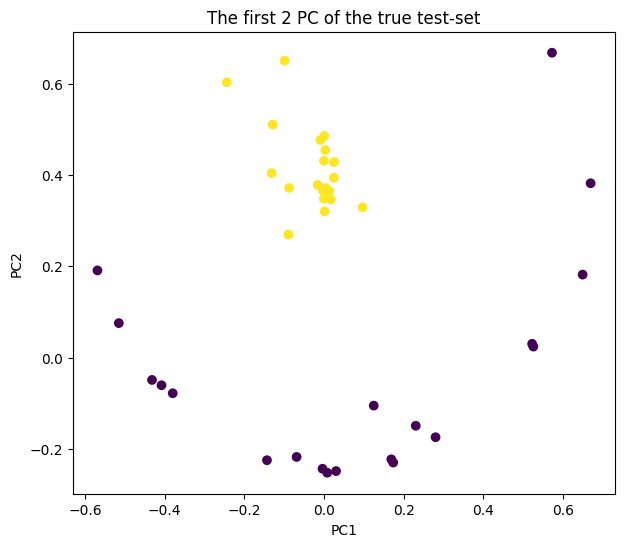

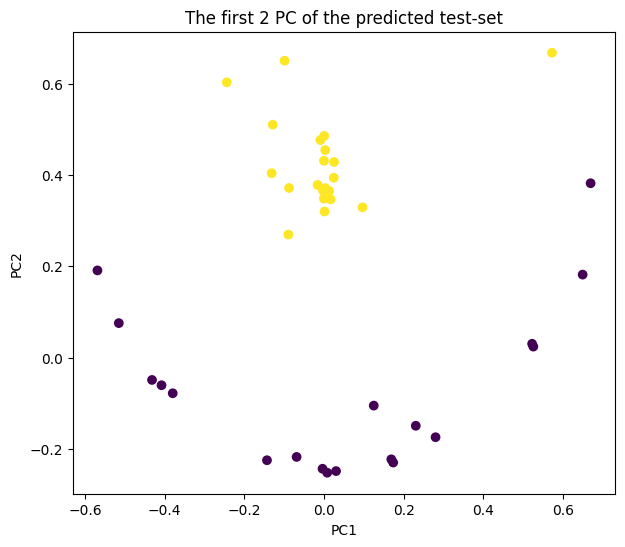

Confusion Matrix:



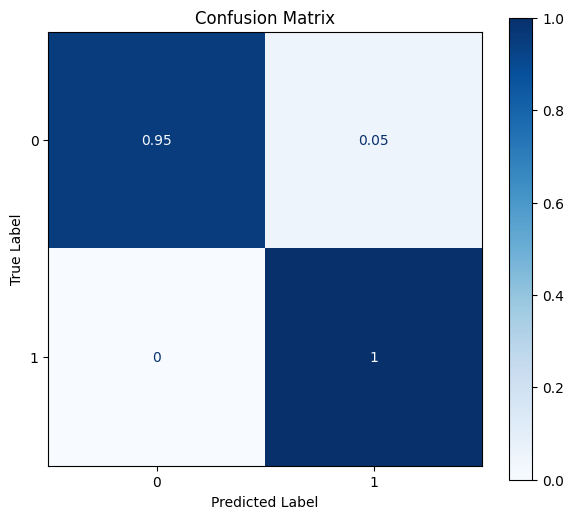

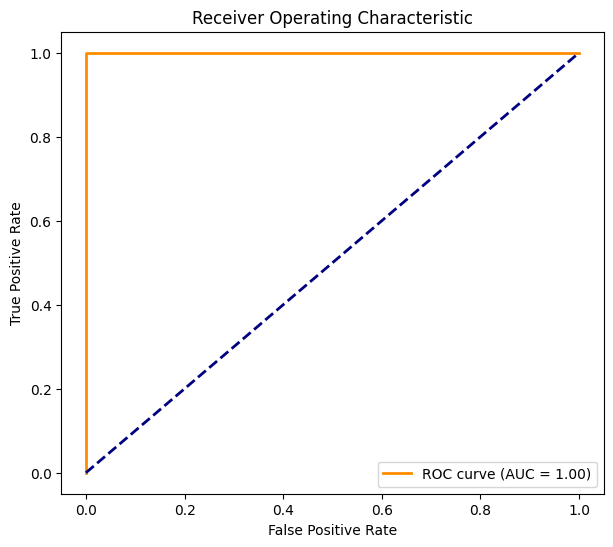



AUC-ROC: 1.0000
Accuracy: 0.9750
F1 Score: 0.9756
Precision: 0.9524
Recall: 1.0000
0.975609756097561


In [492]:
# KPCA
function_AD('kpca', X_train, y_train, X_test, y_test)

### **NOT_** KERNEL ANALYSIS with THE OPTIMUM threshold for the best F1 score

kernel: cosine, gamma: 0.001

AUC:  0.9849999999999999  and f1:  0.0
n:  2
kernel: cosine, gamma: 0.01

AUC:  0.9849999999999999  and f1:  0.0
n:  2
kernel: cosine, gamma: 0.1

AUC:  0.9849999999999999  and f1:  0.0
n:  2
kernel: cosine, gamma: 10

AUC:  0.9849999999999999  and f1:  0.0
n:  2
kernel: cosine, gamma: 100

AUC:  0.9849999999999999  and f1:  0.0
n:  2
kernel: cosine, gamma: 0.001

AUC:  0.9849999999999999  and f1:  0.0
n:  4
kernel: cosine, gamma: 0.01

AUC:  0.9849999999999999  and f1:  0.0
n:  4
kernel: cosine, gamma: 0.1

AUC:  0.9849999999999999  and f1:  0.0
n:  4
kernel: cosine, gamma: 10

AUC:  0.9849999999999999  and f1:  0.0
n:  4
kernel: cosine, gamma: 100

AUC:  0.9849999999999999  and f1:  0.0
n:  4
kernel: cosine, gamma: 0.001

AUC:  0.9849999999999999  and f1:  0.0
n:  6
kernel: cosine, gamma: 0.01

AUC:  0.9849999999999999  and f1:  0.0
n:  6
kernel: cosine, gamma: 0.1

AUC:  0.9849999999999999  and f1:  0.0
n:  6
kernel: cosine, gamma: 10

AUC:  0.984999999

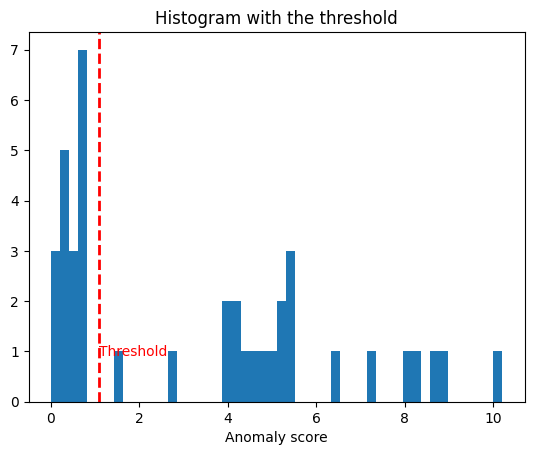

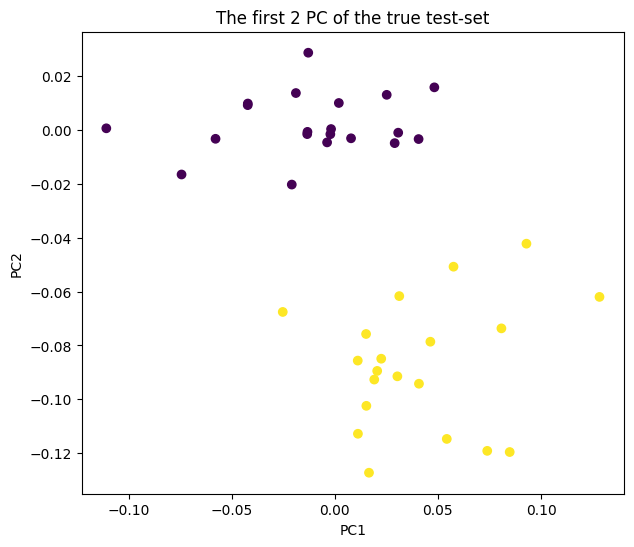

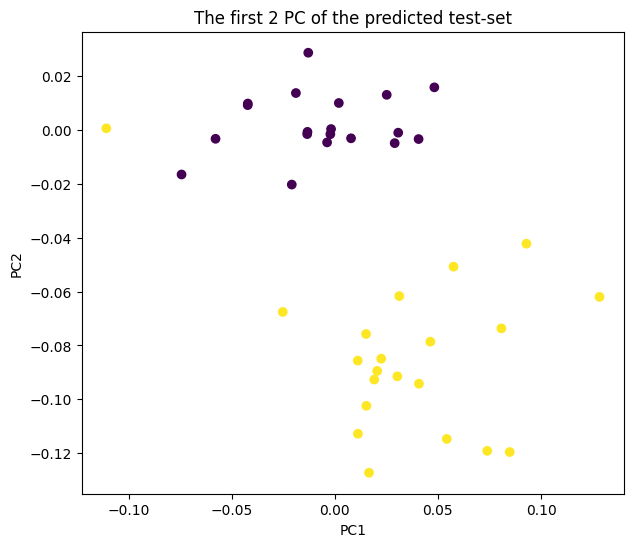

Confusion Matrix:



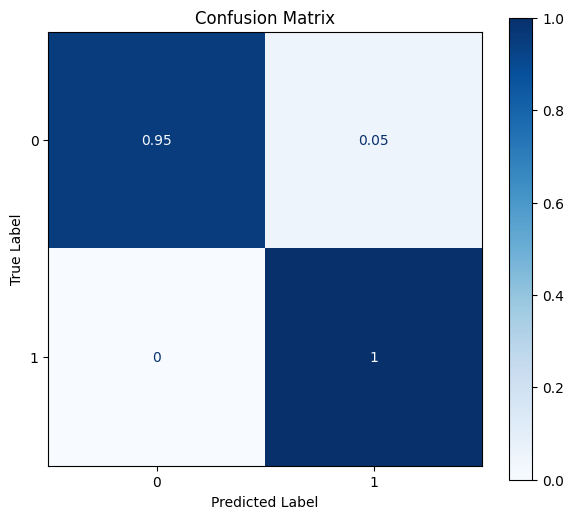

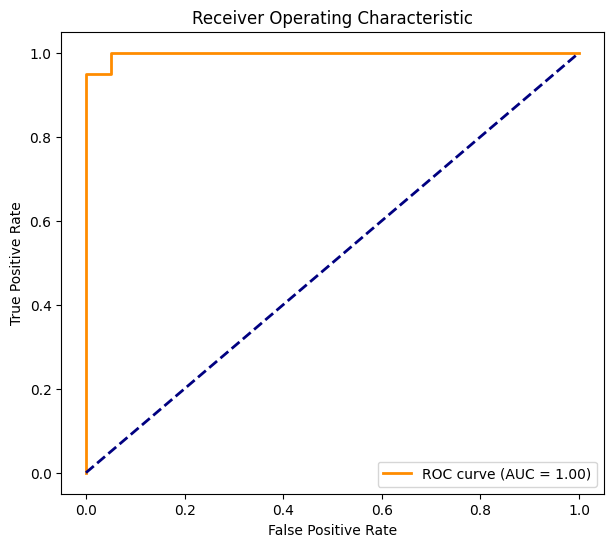



AUC-ROC: 0.9975
Accuracy: 0.9750
F1 Score: 0.9756
Precision: 0.9524
Recall: 1.0000
0.975609756097561


In [493]:
# Best gamma and number of components for PCA:
best_auc = 0.0
best_f1 = 0.0
optimum_gamma = 0.0
optimum_kernel = ''
# optimum_degree = 0
# optimum_coef0 = 0
optimum_n_components = 0

kernels = [
          'cosine', 
           'rbf' 
          #,'sigmoid'
          #,'poly'
           ]

gammas = [0.001, 0.01, 0.1, 10, 100]
degrees = [1, 2, 3]
coef0s = [1, 2]
nn_components = np.arange(2, 101, 2)

auc_values = [[] for _ in range(len(gammas))]

for kernel in kernels:
  for n_components in nn_components:
    for gamma_idx, gamma in enumerate(gammas):
      # for degree in degrees:
      #   for coef0 in coef0s:
          print(f'kernel: {kernel}, gamma: {gamma}')
    
          new_auc, new_f1 = function_AD('kpca', X_train, y_train, X_test, y_test 
                                        ,n_components=n_components
                                        ,analysis=True
                                        ,kernel=kernel
                                        ,gamma=gamma
                                        # ,degree=degree
                                        # ,coef0=coef0
                                        # ,contamination=-1
                                        )
          print("\nAUC: ", new_auc," and f1: ", new_f1)
          auc_values[gamma_idx].append(new_auc)
          print("n: ", n_components)
          # if  new_f1 > best_f1:
          if best_f1 < new_f1 and new_auc > best_auc-0.1:
              best_auc = new_auc
              best_f1 = new_f1
              optimum_gamma = gamma
              optimum_kernel = kernel
              # optimum_degree = degree
              # optimum_coef0 = coef0
              optimum_n_components = n_components
              print("=====================")
              print("\nBest AUC: ", best_auc)
              print("\nBest F1: ", best_f1)
              print("\noptimum_kernel: ", optimum_kernel)
              print("\noptimum_n_components: ", optimum_n_components)
              print("\noptimum_gamma: ", optimum_gamma)
              # print("\noptimum_degree: ", optimum_degree)
              # print("\noptimum_coef0: ", optimum_coef0)
              print("=====================")

print("=====================")
print("\nBest AUC: ", best_auc)
print("\nBest F1: ", best_f1)
print("\noptimum_kernel: ", optimum_kernel)
print("\noptimum_n_components: ", optimum_n_components)
print("\noptimum_gamma: ", optimum_gamma)
# print("\noptimum_degree: ", optimum_degree)
# print("\noptimum_coef0: ", optimum_coef0)
print("=====================")

# for gamma_idx, gamma in enumerate(gammas):
#     plt.plot(nn_components, auc_values[gamma_idx], label='gamma='+str(gamma))
    
# plt.xlabel('Number of Components')
# plt.ylabel('AUC')
# plt.legend()
# plt.show()




new_auc = function_AD('kpca', X_train, y_train, X_test, y_test, 
                      n_components=optimum_n_components, 
                      kernel=optimum_kernel, 
                      gamma=optimum_gamma, 
                      # degree=optimum_degree, 
                      # coef0=optimum_coef0,
                      # contamination=-1
                      )

### **Park's Kernel Analysis in order to get the best AUC when finding the optimum parameter gamma**

In [494]:
X = iris_df.iloc[:, :-1].values
y = iris_df['target'].values
X = scaler.fit_transform(X)

In [495]:

# FOR ALL CLASSES: Return AUC
#Kernel_PCA_AUC(X, y)

# FOR ALL CLASSES: Find the optimum gamma for the best AUC
Kernel_PCA_AUC(X, y, kernel_analysis=True)

# FOR Class: 0 : Return AUC
#Kernel_PCA_AUC(X, y)

# For Class: 0 : Find the optimum gamma for the best AUC
#Kernel_PCA_AUC(X, y, kernel_analysis=True)


All different classes:  [0 1 2]

Number of classes:  3

For the class:  0

Optimum gamma:  0.0009765625

Best AUC:  1.0

For the class:  1

Optimum gamma:  0.1613673997434256

Best AUC:  1.0

For the class:  2

Optimum gamma:  0.07779328684150147

Best AUC:  1.0


## <font color='white'> 2. <font color='orange'>**Vowel</font>  Dataset**</font></font>

### **SPLIT DATASET**

In [496]:
contamination = counts_v[1]/(counts_v[0] + counts_v[1])
# The real contamination of the dataset
contamination

0.288

In [497]:
dataset = all_datasets[7]
sep_regex = '\s{1,2}' # Because the data file has ' ' and '  ' between each column

#atasetorig = 'vowel.tr-orig-order'
#sep_regex = ','

df = pd.read_csv(directory_path + dataset, sep=sep_regex, header=None)

X = df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values

<ipython-input-497-a3a592431be5>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(directory_path + dataset, sep=sep_regex, header=None)


Choose One vs One or One vs All

In [498]:
selected_class = 0
other_class = 1

# ONE VS ALL
y = np.where(y == selected_class, 0, 1)

# ONE vs ONE
# mask = np.logical_or(y == selected_class, y == other_class)
# X = X[mask]
# y = y[mask]
# y = np.where(y == selected_class, 0, 1)

In [499]:
X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, 0, percentage=0.6)
# The created contamination for a model that we are going to train it only with normal chosen class
contamination = 0.00000001

###**ANOMALY DETECTION**

The non-0s PCA components are:  13


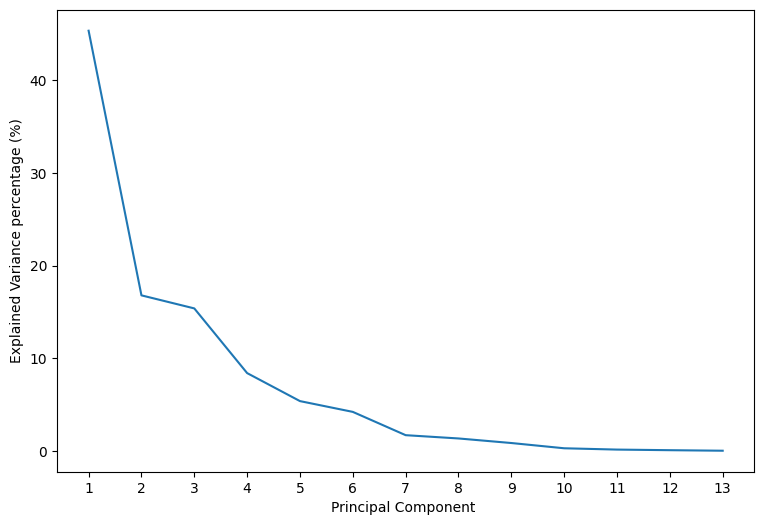

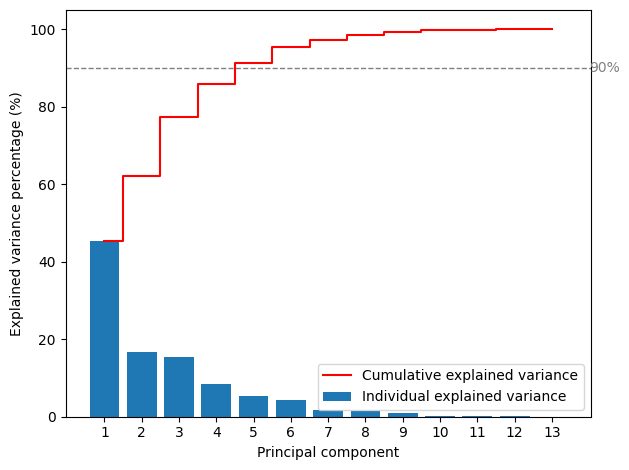

Number of principal components needed to explain 90% of variance: 5
The threshold of the PCA method for the given contamination rate: 231.05343315203163

Train-set with the threshold:



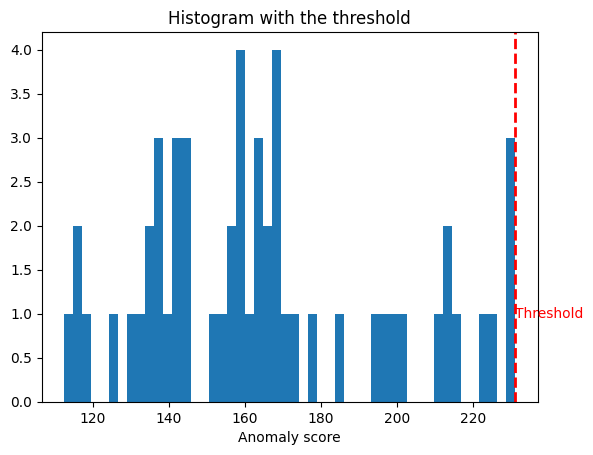



Another option to choose better threshold from the above plot.
Then run again for other contamination for better results.


Test-set with the threshold:



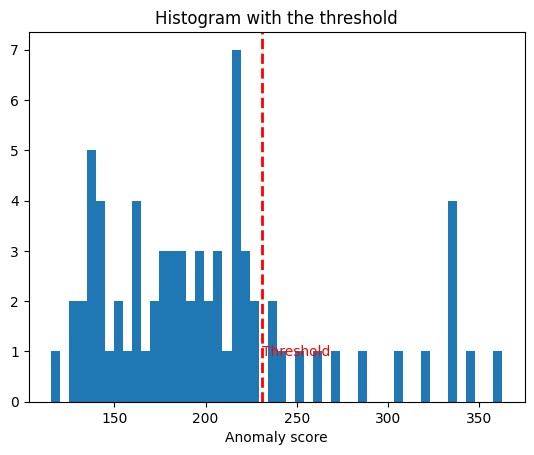



     Group  Count    Count %     0    1     2     3     4     5     6     7  \
0   Normal     53  98.148148  0.05  0.1  0.12 -0.19 -1.62  0.42  1.16  1.10   
1  Novelty      1   1.851852 -0.94  0.0  1.07 -2.19  0.07  2.32  1.59 -0.21   

      8     9    10    11    12  Anomaly_Score  
0  0.93 -0.24 -0.58 -0.55  0.11         164.04  
1 -1.76 -2.09 -0.89  1.50  0.41         231.05  


     Group  Count    Count %     0     1     2     3     4     5     6     7  \
0   Normal     57  79.166667  0.01 -0.11 -0.20  0.21 -1.12 -0.17  0.73  0.59   
1  Novelty     15  20.833333 -0.00  0.37  0.53 -0.59  0.99  0.26 -0.73 -0.15   

      8     9    10    11    12  Anomaly_Score  
0  0.64  0.12 -0.27 -0.44 -0.18         178.19  
1 -0.07  0.05  0.17 -0.15 -0.12         297.46  


Confusion Matrix:



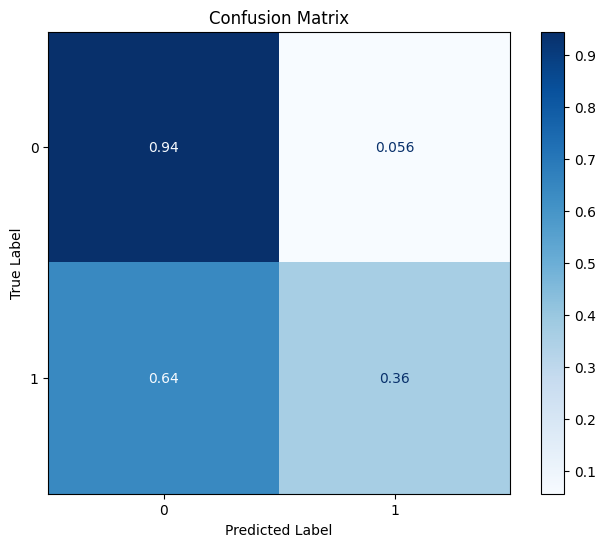

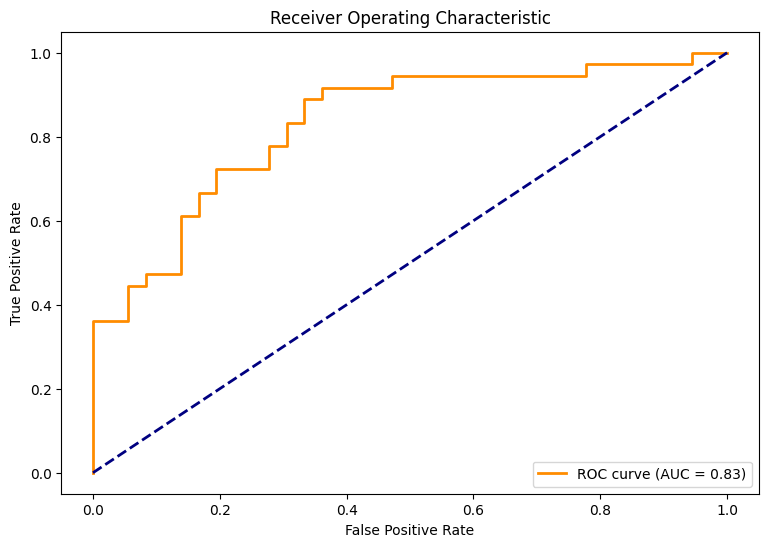



Accuracy:  0.6527777777777778
Precision:  0.8666666666666667
Recall:  0.3611111111111111
F1 Score:  0.5098039215686274
AUC-ROC: 0.8318

For test data: ROC:0.8318, precision @ rank n:0.7222
None


In [500]:
# PCA
pca_kpca_with_metrics('pca', X_train, y_train, X_test, y_test, contamination=contamination)

The threshold of the PCA method for the given contamination rate: 0.9085257769027455

Train-set with the threshold:



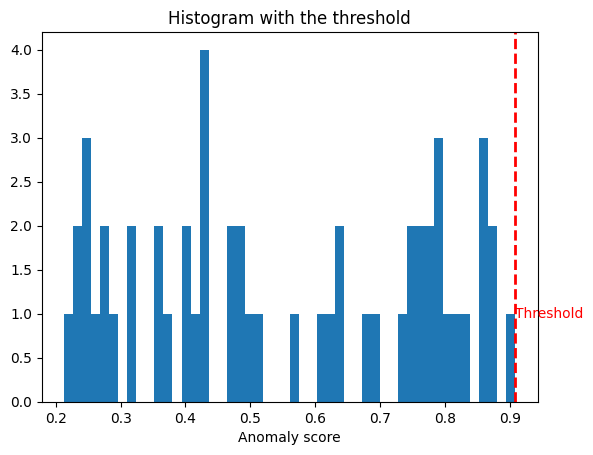



Another option to choose better threshold from the above plot.
Then run again for other contamination for better results.


Test-set with the threshold:



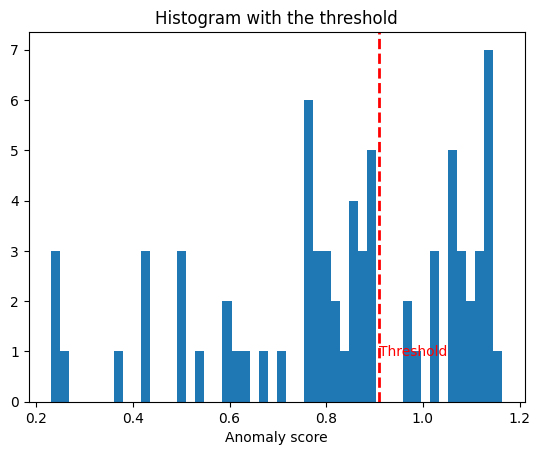



     Group  Count    Count %     0     1     2     3     4     5     6     7  \
0   Normal     53  98.148148  0.05  0.12  0.16 -0.28 -1.58  0.52  1.18  1.10   
1  Novelty      1   1.851852 -0.94 -1.16 -0.94  2.29 -1.85 -2.69  0.42 -0.11   

      8    9    10    11    12  Anomaly_Score  
0  0.85 -0.3 -0.63 -0.49  0.13           0.55  
1  2.71  1.1  1.75 -1.85 -1.01           0.91  


     Group  Count  Count %     0     1     2     3     4     5     6     7  \
0   Normal     45     62.5  0.04  0.00 -0.09 -0.05 -1.34  0.00  1.02  0.83   
1  Novelty     27     37.5 -0.04 -0.03  0.03  0.21  0.43 -0.21 -0.58 -0.23   

      8     9    10    11    12  Anomaly_Score  
0  0.76  0.09 -0.33 -0.64 -0.13           0.69  
1  0.03  0.12  0.08  0.05 -0.24           1.08  


Confusion Matrix:



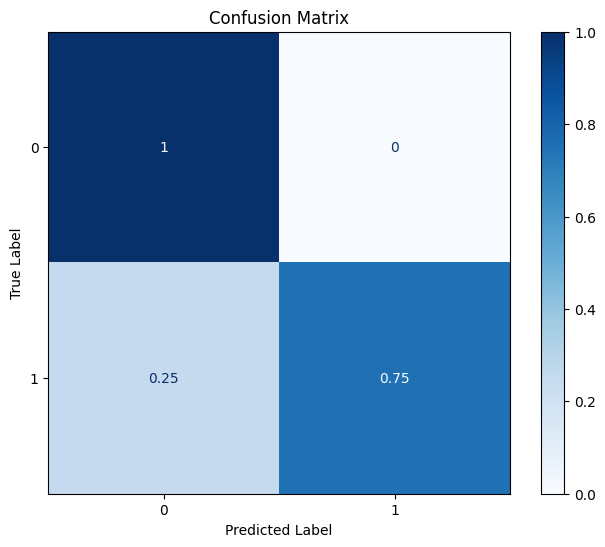

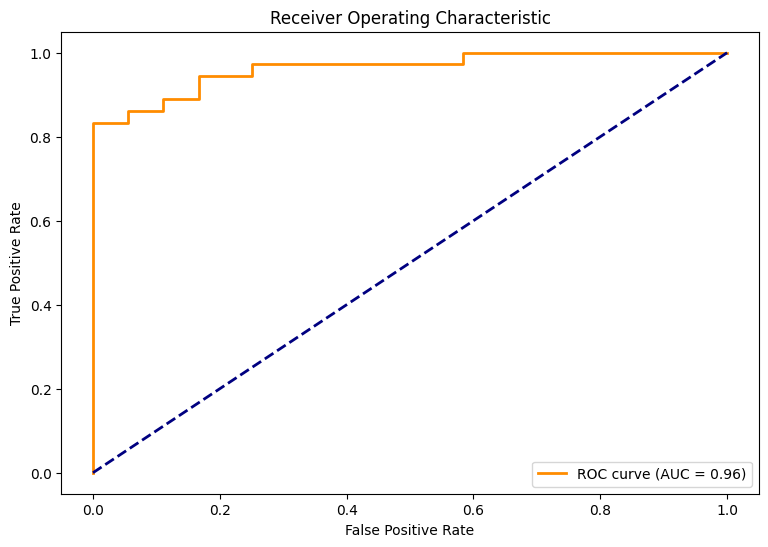



Accuracy:  0.875
Precision:  1.0
Recall:  0.75
F1 Score:  0.8571428571428571
AUC-ROC: 0.9630

For test data: ROC:0.963, precision @ rank n:0.8889
None


In [501]:
# KPCA
pca_kpca_with_metrics('kpca', X_train, y_train, X_test, y_test, contamination=contamination)

###**NOT_** NOVELTY DETECTION

The non-0s PCA components are: 
 13


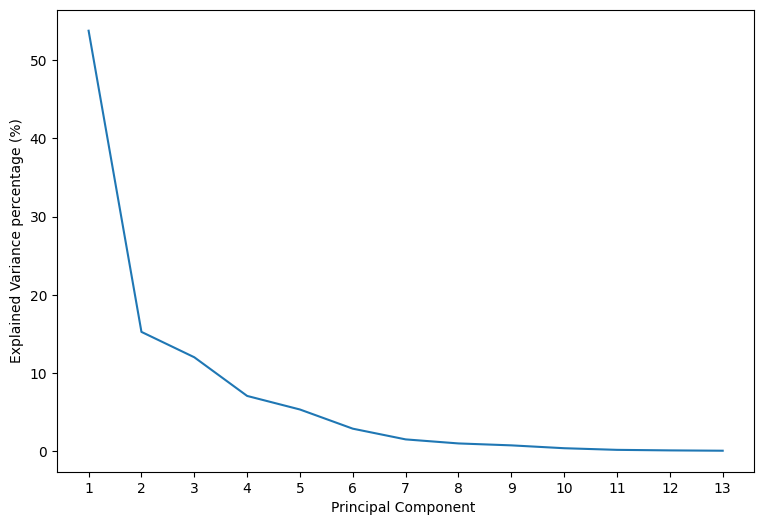

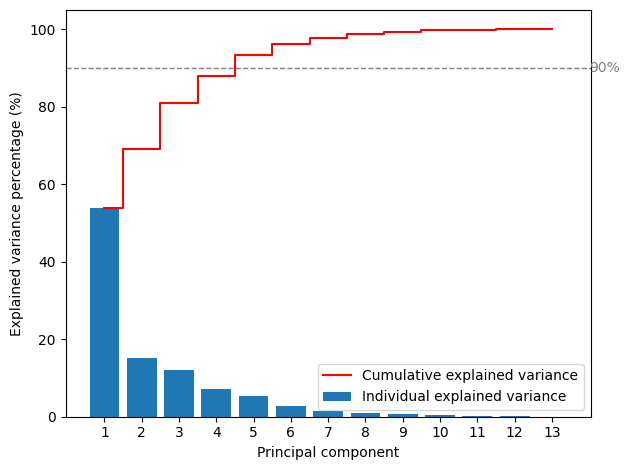

Number of principal components needed to explain 90% of variance: 5


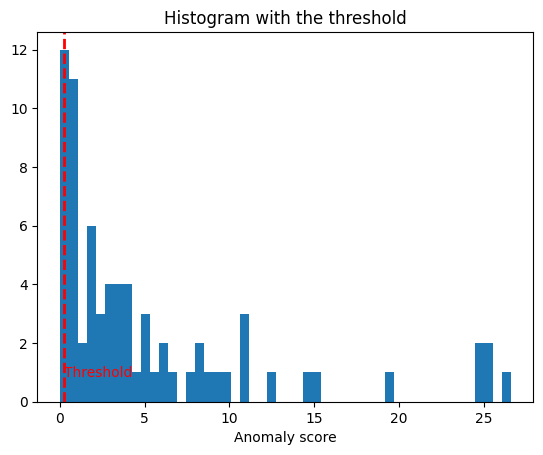

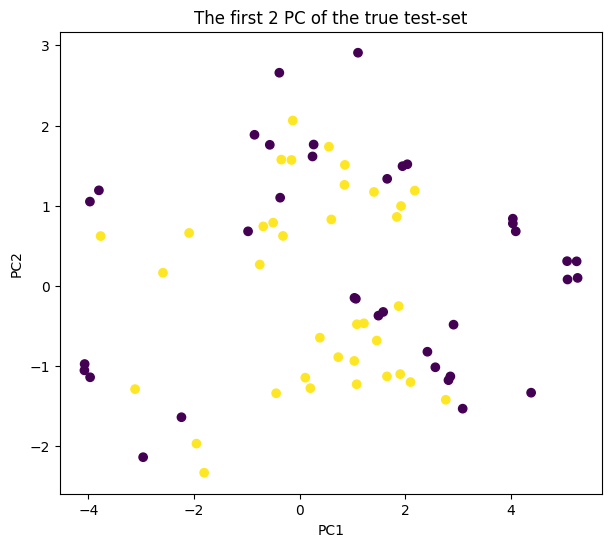

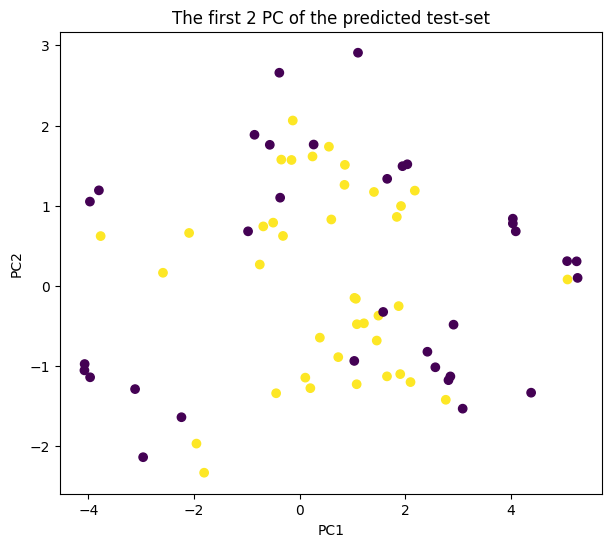

Confusion Matrix:



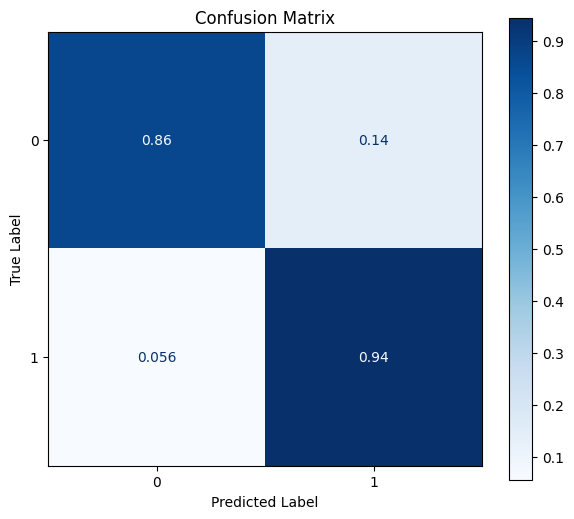

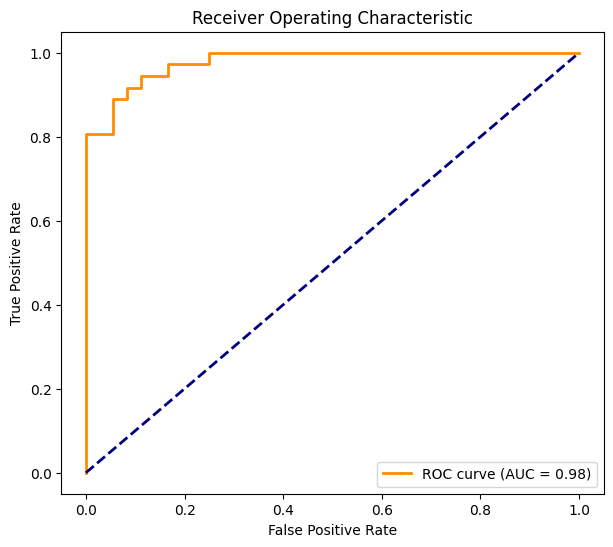



AUC-ROC: 0.9784
Accuracy: 0.9028
F1 Score: 0.9067
Precision: 0.8718
Recall: 0.9444
0.9066666666666667


In [502]:
# PCA
function_AD('pca', X_train, y_train, X_test, y_test)

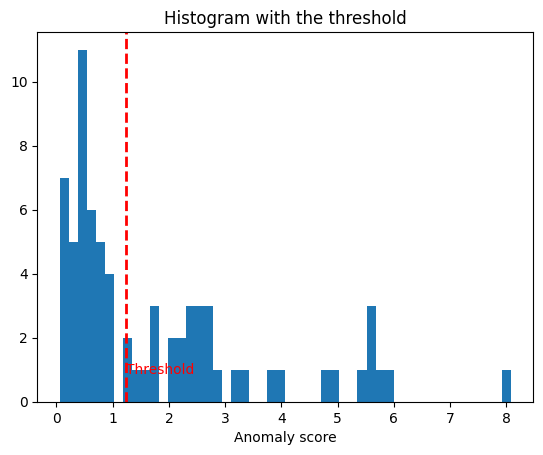

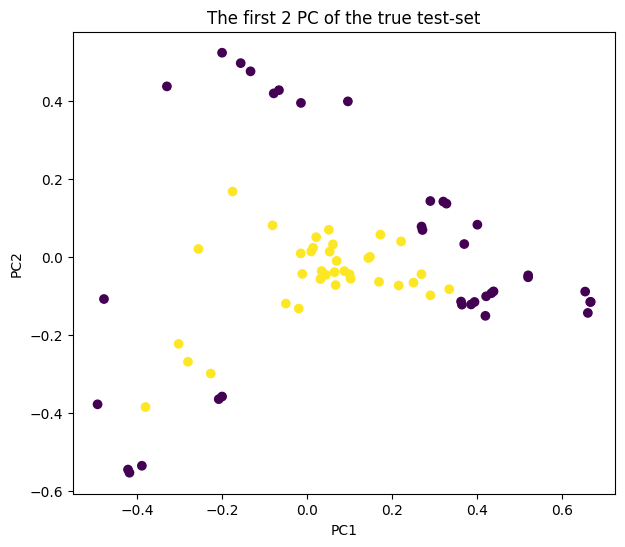

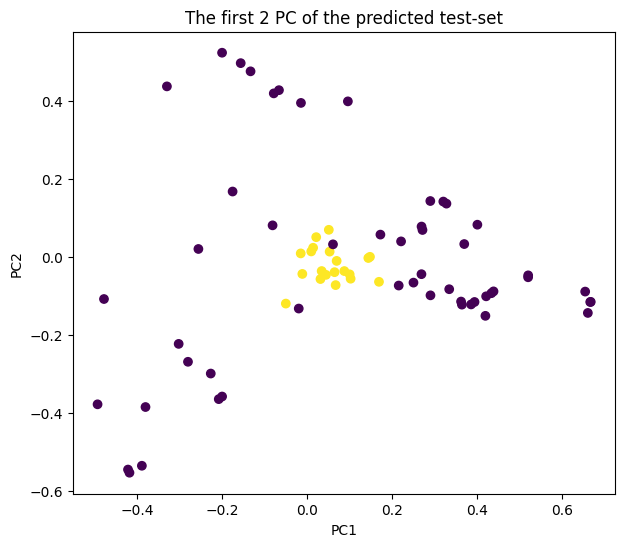

Confusion Matrix:



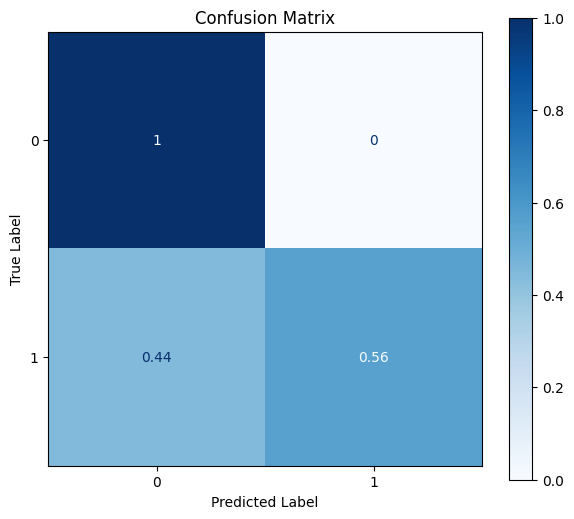

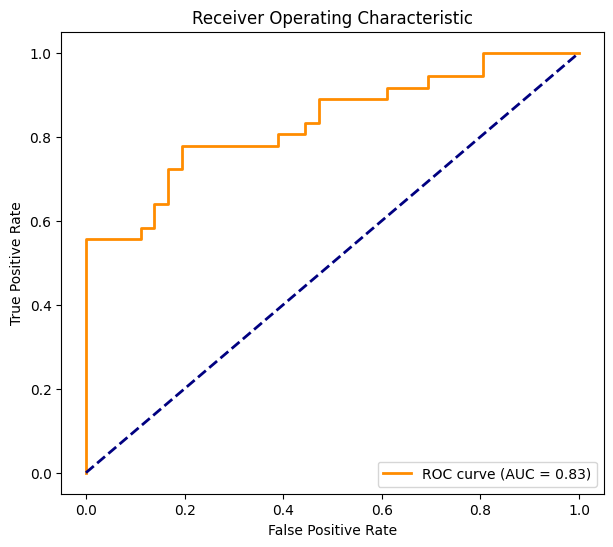



AUC-ROC: 0.8341
Accuracy: 0.7778
F1 Score: 0.7143
Precision: 1.0000
Recall: 0.5556
0.7142857142857143


In [503]:
# KPCA
function_AD('kpca', X_train, y_train, X_test, y_test)

### **NOT_** KERNEL ANALYSIS with THE OPTIMUM threshold for the best F1 score

kernel: cosine, gamma: 0.001

AUC:  0.6296296296296295  and f1:  0.05263157894736842
n:  2

Best AUC:  0.6296296296296295

Best F1:  0.05263157894736842

optimum_kernel:  cosine

optimum_n_components:  2

optimum_gamma:  0.001
kernel: cosine, gamma: 0.01

AUC:  0.6296296296296295  and f1:  0.05263157894736842
n:  2
kernel: cosine, gamma: 0.1

AUC:  0.6296296296296295  and f1:  0.05263157894736842
n:  2
kernel: cosine, gamma: 10

AUC:  0.6296296296296295  and f1:  0.05263157894736842
n:  2
kernel: cosine, gamma: 100

AUC:  0.6296296296296295  and f1:  0.05263157894736842
n:  2
kernel: cosine, gamma: 0.001

AUC:  0.6296296296296295  and f1:  0.05263157894736842
n:  4
kernel: cosine, gamma: 0.01

AUC:  0.6296296296296295  and f1:  0.05263157894736842
n:  4
kernel: cosine, gamma: 0.1

AUC:  0.6296296296296295  and f1:  0.05263157894736842
n:  4
kernel: cosine, gamma: 10

AUC:  0.6296296296296295  and f1:  0.05263157894736842
n:  4
kernel: cosine, gamma: 100

AUC:  0.6296296296296295  and f

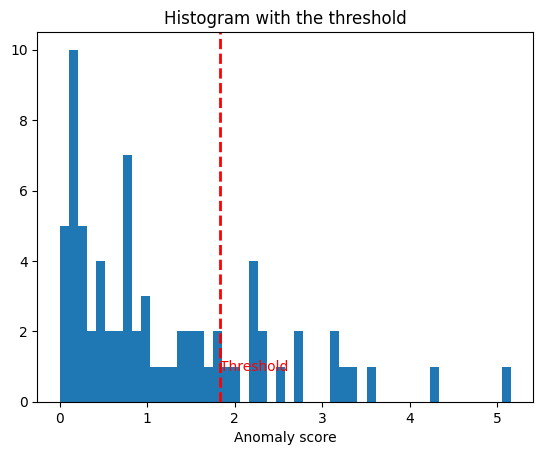

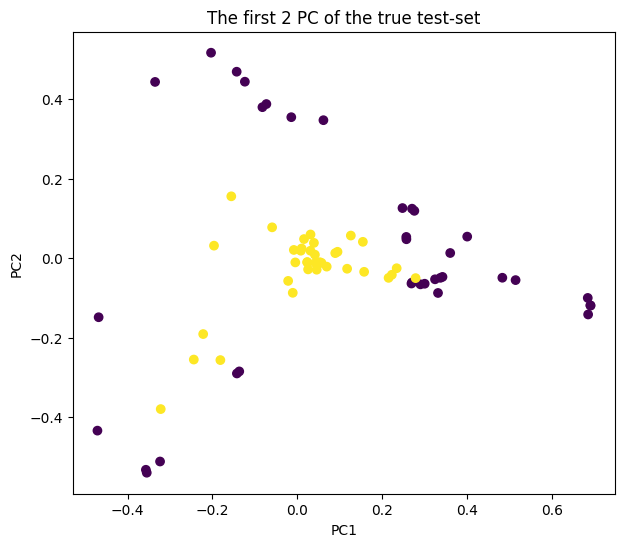

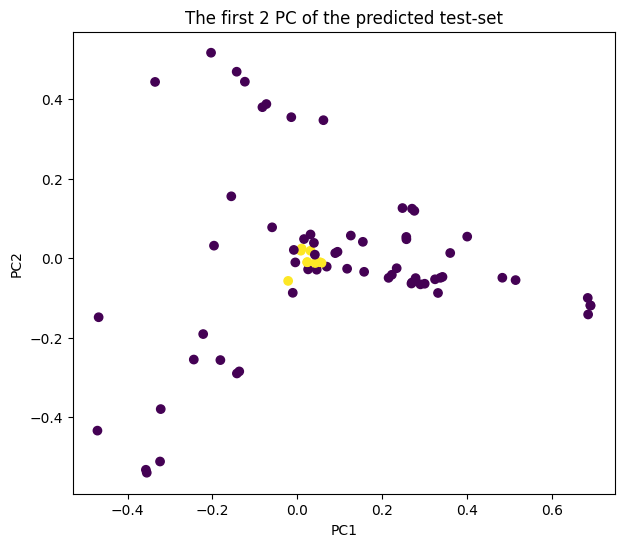

Confusion Matrix:



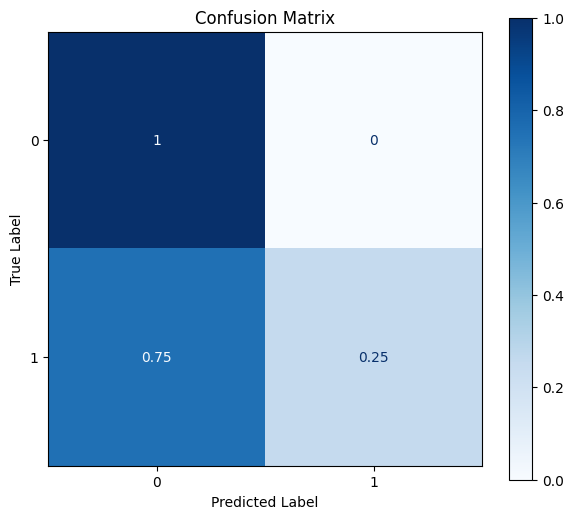

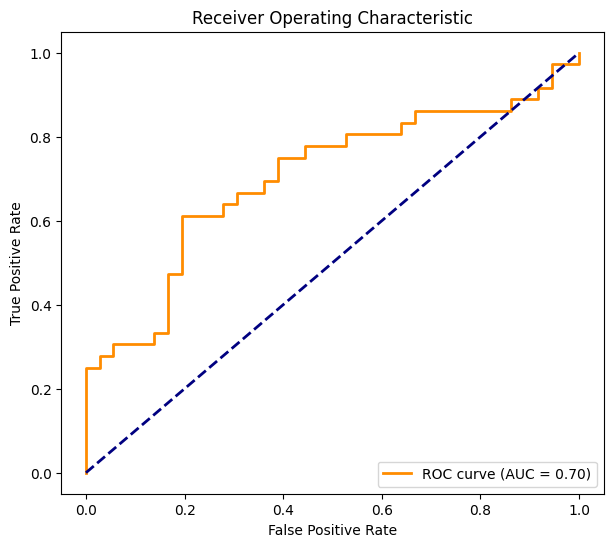



AUC-ROC: 0.7029
Accuracy: 0.6250
F1 Score: 0.4000
Precision: 1.0000
Recall: 0.2500
0.4


In [504]:
# Best gamma and number of components for PCA:
best_auc = 0.0
best_f1 = 0.0
optimum_gamma = 0.0
optimum_kernel = ''
# optimum_degree = 0
# optimum_coef0 = 0
optimum_n_components = 0

kernels = [
          'cosine', 
           'rbf' 
          #,'sigmoid'
          #,'poly'
           ]

gammas = [0.001, 0.01, 0.1, 10, 100]
degrees = [1, 2, 3]
coef0s = [1, 2]
nn_components = np.arange(2, 101, 2)

auc_values = [[] for _ in range(len(gammas))]

for kernel in kernels:
  for n_components in nn_components:
    for gamma_idx, gamma in enumerate(gammas):
      # for degree in degrees:
      #   for coef0 in coef0s:
          print(f'kernel: {kernel}, gamma: {gamma}')
    
          new_auc, new_f1 = function_AD('kpca', X_train, y_train, X_test, y_test 
                                        ,n_components=n_components
                                        ,analysis=True
                                        ,kernel=kernel
                                        ,gamma=gamma
                                        # ,degree=degree
                                        # ,coef0=coef0
                                        # ,contamination=-1
                                        )
          print("\nAUC: ", new_auc," and f1: ", new_f1)
          auc_values[gamma_idx].append(new_auc)
          print("n: ", n_components)
          # if  new_f1 > best_f1:
          if best_f1 < new_f1 and new_auc > best_auc-0.1:
              best_auc = new_auc
              best_f1 = new_f1
              optimum_gamma = gamma
              optimum_kernel = kernel
              # optimum_degree = degree
              # optimum_coef0 = coef0
              optimum_n_components = n_components
              print("=====================")
              print("\nBest AUC: ", best_auc)
              print("\nBest F1: ", best_f1)
              print("\noptimum_kernel: ", optimum_kernel)
              print("\noptimum_n_components: ", optimum_n_components)
              print("\noptimum_gamma: ", optimum_gamma)
              # print("\noptimum_degree: ", optimum_degree)
              # print("\noptimum_coef0: ", optimum_coef0)
              print("=====================")

print("=====================")
print("\nBest AUC: ", best_auc)
print("\nBest F1: ", best_f1)
print("\noptimum_kernel: ", optimum_kernel)
print("\noptimum_n_components: ", optimum_n_components)
print("\noptimum_gamma: ", optimum_gamma)
# print("\noptimum_degree: ", optimum_degree)
# print("\noptimum_coef0: ", optimum_coef0)
print("=====================")

# for gamma_idx, gamma in enumerate(gammas):
#     plt.plot(nn_components, auc_values[gamma_idx], label='gamma='+str(gamma))
    
# plt.xlabel('Number of Components')
# plt.ylabel('AUC')
# plt.legend()
# plt.show()




new_auc = function_AD('kpca', X_train, y_train, X_test, y_test, 
                      n_components=optimum_n_components, 
                      kernel=optimum_kernel, 
                      gamma=optimum_gamma, 
                      # degree=optimum_degree, 
                      # coef0=optimum_coef0,
                      # contamination=-1
                      )

### **Park's Kernel Analysis in order to get the best AUC when finding the optimum parameter gamma**

In [505]:
dataset = all_datasets[7]
sep_regex = '\s{1,2}' # Because the data file has ' ' and '  ' between each column

#atasetorig = 'vowel.tr-orig-order'
#sep_regex = ','

df = pd.read_csv(directory_path + dataset, sep=sep_regex, header=None)

X = df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values

<ipython-input-505-a3a592431be5>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(directory_path + dataset, sep=sep_regex, header=None)


In [506]:
# FOR ALL CLASSES: Return AUC
#Kernel_PCA_AUC(X, y)

# FOR ALL CLASSES: Find the optimum gamma for the best AUC
Kernel_PCA_AUC(X, y, kernel_analysis=True)

# FOR Class: 0 : Return AUC
#Kernel_PCA_AUC(X, y)

# For Class: 0 : Find the optimum gamma for the best AUC
#Kernel_PCA_AUC(X, y, kernel_analysis=True)


All different classes:  [ 0  1  2  3  4  5  6  7  8  9 10]

Number of classes:  11

For the class:  0

Optimum gamma:  0.1613673997434256

Best AUC:  1.0

For the class:  1

Optimum gamma:  0.018079847457542493

Best AUC:  1.0

For the class:  2

Optimum gamma:  0.03750320998681571

Best AUC:  1.0

For the class:  3

Optimum gamma:  0.03750320998681571

Best AUC:  1.0

For the class:  4

Optimum gamma:  0.33472602530611795

Best AUC:  1.0

For the class:  5

Optimum gamma:  0.33472602530611795

Best AUC:  0.9845679012345678

For the class:  6

Optimum gamma:  0.1613673997434256

Best AUC:  0.9876543209876543

For the class:  7

Optimum gamma:  0.03750320998681571

Best AUC:  0.9969135802469136

For the class:  8

Optimum gamma:  0.1613673997434256

Best AUC:  0.9845679012345678

For the class:  9

Optimum gamma:  0.07779328684150147

Best AUC:  0.9969135802469136

For the class:  10

Optimum gamma:  0.6943255713073277

Best AUC:  1.0


## <font color='white'> 3. <font color='red'> **Breast Cancer**</font> **Dataset**</font></font>

### **SPLIT DATASET**

In [507]:
X = breast_cancer_df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = breast_cancer_df.iloc[:, -1].values

In [508]:
selected_class = 0
other_class = 1

# ONE VS ALL
# y = np.where(y == selected_class, 0, 1)

# ONE vs ONE
mask = np.logical_or(y == selected_class, y == other_class)
X = X[mask]
y = y[mask]
y = np.where(y == selected_class, 0, 1)

In [509]:
X_train, X_test, X_test_n, X_test_a, y_train, y_test, y_test_n, y_test_a = split_data(X, y, 0, percentage=0.6)
# The created contamination for a model that we are going to train it only with normal chosen class
contamination = 0.00000001

###**ANOMALY DETECTION**

The non-0s PCA components are:  30


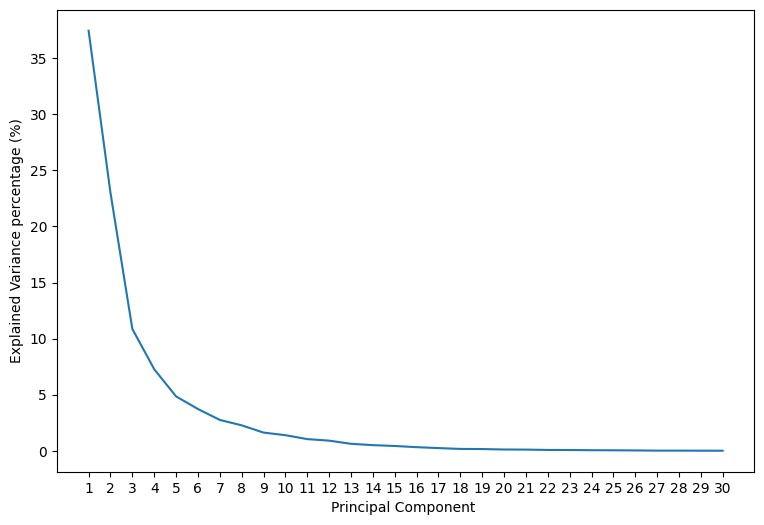

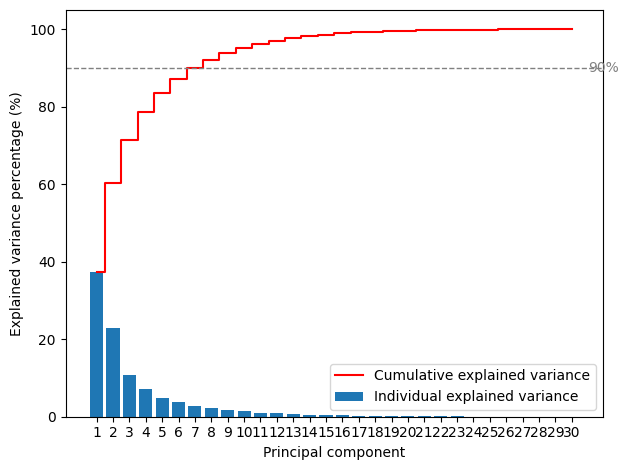

Number of principal components needed to explain 90% of variance: 8
The threshold of the PCA method for the given contamination rate: 2206.941412472697

Train-set with the threshold:



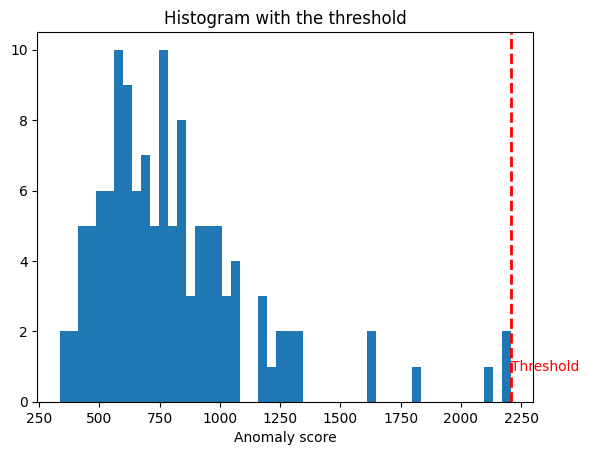



Another option to choose better threshold from the above plot.
Then run again for other contamination for better results.


Test-set with the threshold:



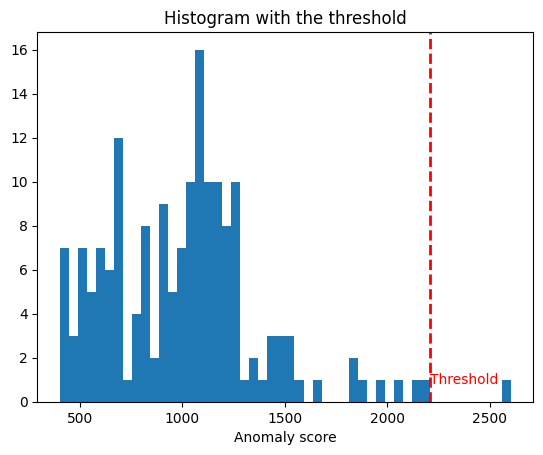



     Group  Count    Count %     0     1     2     3     4     5     6  ...  \
0   Normal    126  99.212598  0.99  0.54  1.01  0.97  0.45  0.78  0.91  ...   
1  Novelty      1   0.787402  3.78  1.62  3.91  5.25  0.86  1.79  3.45  ...   

     21    22    23    24    25    26    27    28    29  Anomaly_Score  
0  0.55  1.05  1.00  0.48  0.70  0.78  1.02  0.40  0.30         799.17  
1  0.93  4.29  5.93  0.15  1.09  1.97  2.25 -0.42 -0.54        2206.94  

[2 rows x 34 columns]


     Group  Count    Count %     0     1     2     3     4     5     6  ...  \
0   Normal    169  99.411765  0.13  0.01  0.13  0.12  0.17  0.16  0.17  ...   
1  Novelty      1   0.588235 -1.45 -0.46 -1.37 -1.15  0.73  0.70  2.81  ...   

     21    22    23    24    25    26    27    28    29  Anomaly_Score  
0  0.09  0.16  0.13  0.25  0.23  0.25  0.24  0.22  0.19         996.40  
1 -0.49 -1.24 -0.98  0.69  1.16  4.70  0.92  2.15  1.86        2602.87  

[2 rows x 34 columns]


Confusion Matrix:



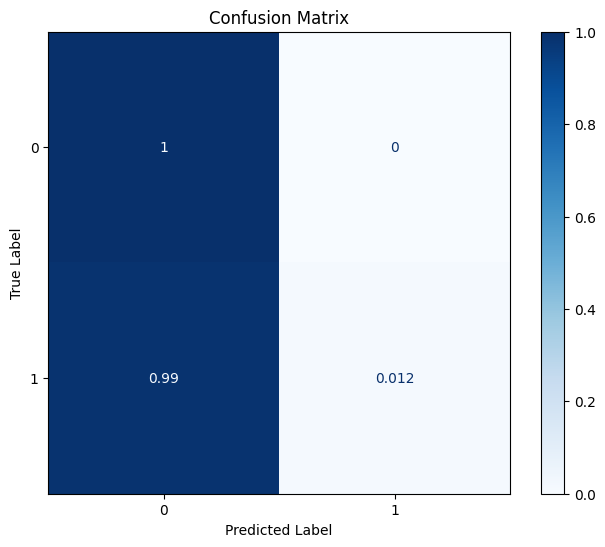

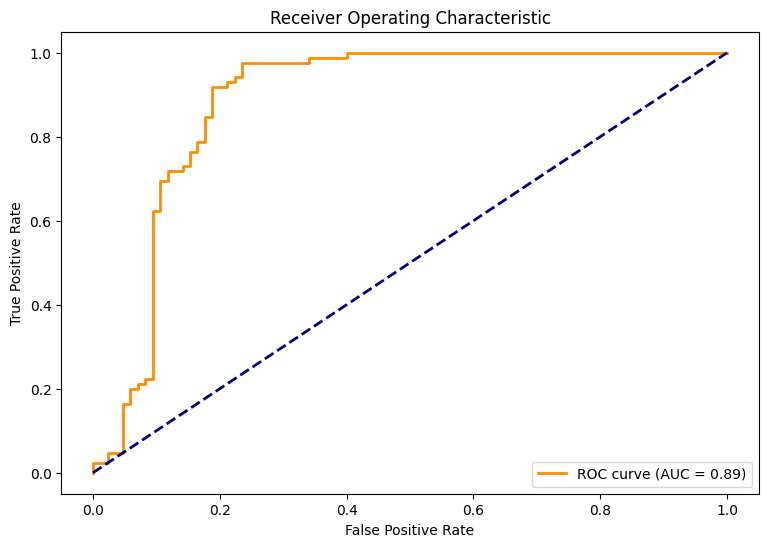



Accuracy:  0.5058823529411764
Precision:  1.0
Recall:  0.011764705882352941
F1 Score:  0.023255813953488372
AUC-ROC: 0.8854

For test data: ROC:0.8854, precision @ rank n:0.8235
None


In [510]:
# PCA
pca_kpca_with_metrics('pca', X_train, y_train, X_test, y_test, contamination=contamination)

The threshold of the PCA method for the given contamination rate: 1.0525215479913614

Train-set with the threshold:



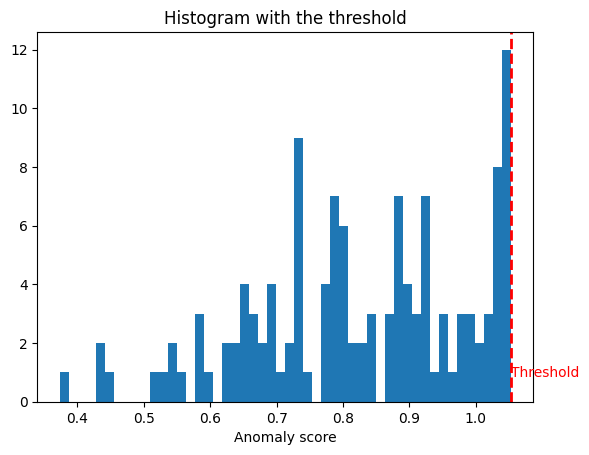



Another option to choose better threshold from the above plot.
Then run again for other contamination for better results.


Test-set with the threshold:



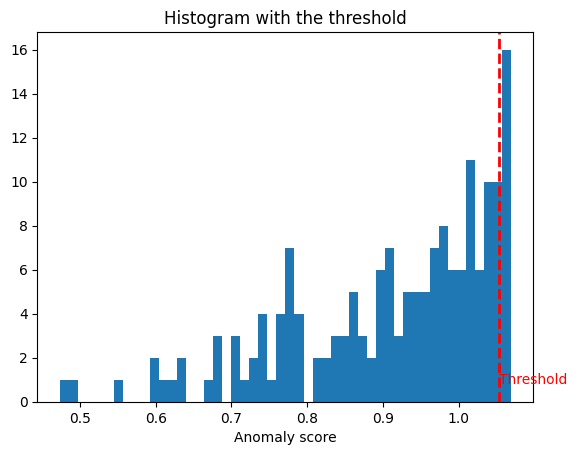



     Group  Count    Count %     0     1     2     3     4     5     6  ...  \
0   Normal    126  99.212598  0.99  0.55  1.01  0.97  0.45  0.79  0.92  ...   
1  Novelty      1   0.787402  3.97 -0.19  3.98  5.24  1.27  0.90  2.90  ...   

     21    22    23    24    25    26    27    28    29  Anomaly_Score  
0  0.56  1.07  1.03  0.49  0.71  0.80  1.03  0.41  0.31           0.82  
1 -1.17  2.42  2.85 -0.80 -0.65  0.23  0.68 -2.03 -1.59           1.05  

[2 rows x 34 columns]


     Group  Count    Count %     0     1     2     3     4     5     6  ...  \
0   Normal    149  87.647059  0.24  0.04  0.24  0.21  0.12  0.10  0.16  ...   
1  Novelty     21  12.352941 -0.75 -0.21 -0.70 -0.63  0.51  0.61  0.33  ...   

     21    22    23    24    25    26    27    28    29  Anomaly_Score  
0  0.13  0.26  0.21  0.21  0.16  0.25  0.29  0.16  0.09           0.89  
1 -0.20 -0.59 -0.53  0.59  0.76  0.50 -0.05  0.76  1.02           1.06  

[2 rows x 34 columns]


Confusion Matrix:



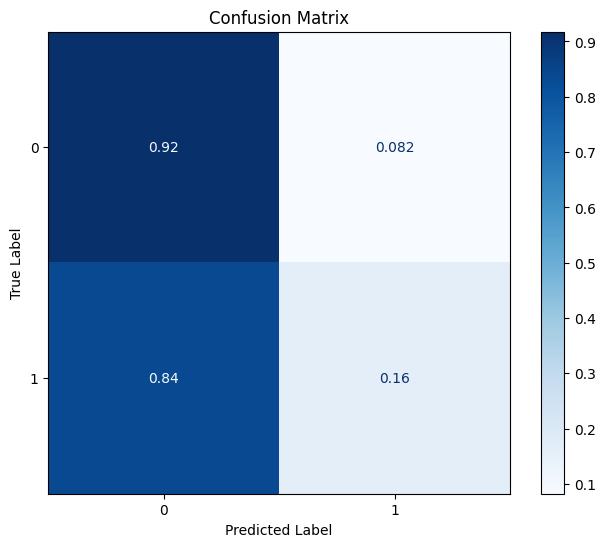

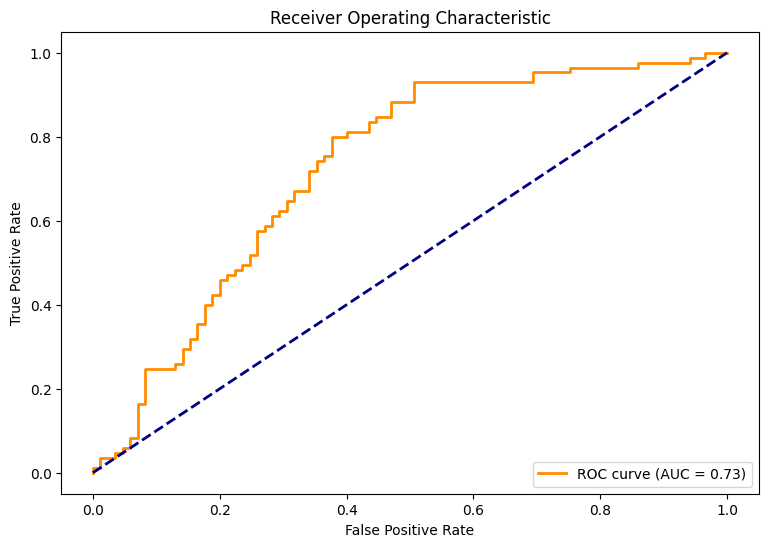



Accuracy:  0.5411764705882353
Precision:  0.6666666666666666
Recall:  0.16470588235294117
F1 Score:  0.2641509433962264
AUC-ROC: 0.7275

For test data: ROC:0.7275, precision @ rank n:0.6706
None


In [511]:
# KPCA
pca_kpca_with_metrics('kpca', X_train, y_train, X_test, y_test, contamination=contamination)

###**NOT_** NOVELTY DETECTION

The non-0s PCA components are: 
 30


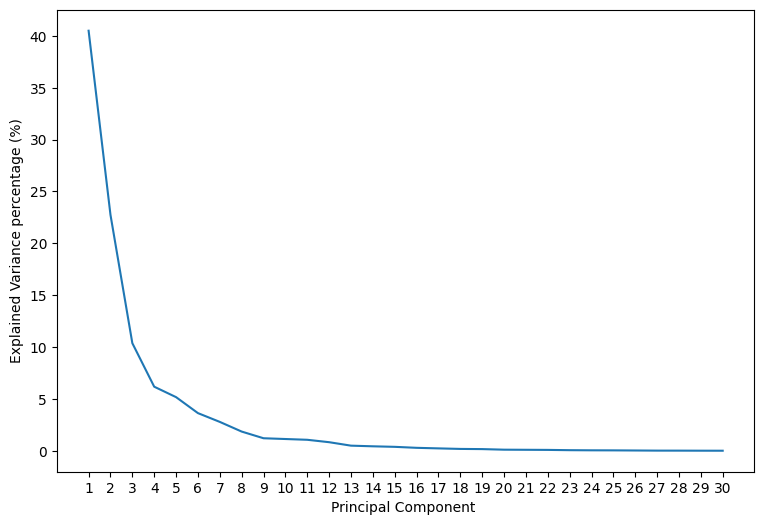

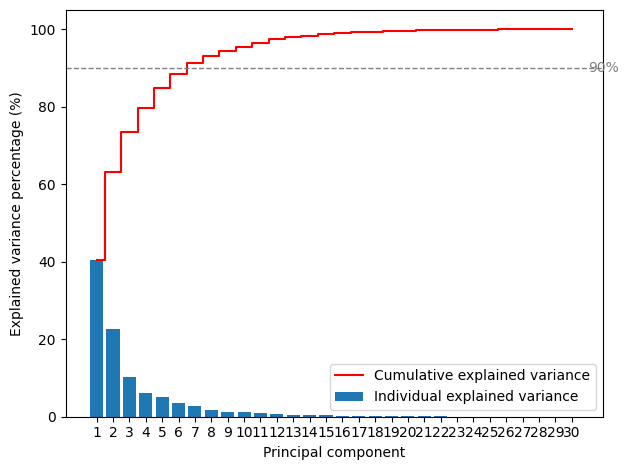

Number of principal components needed to explain 90% of variance: 7


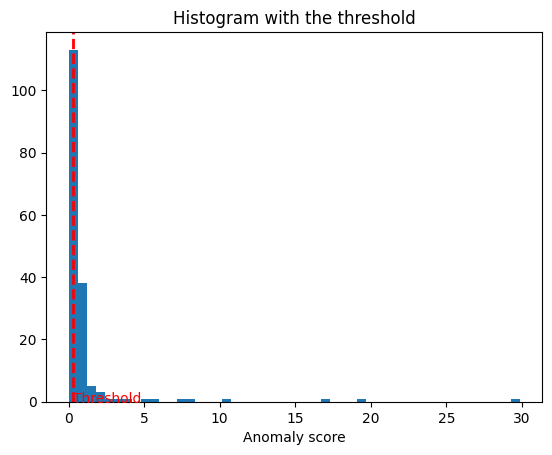

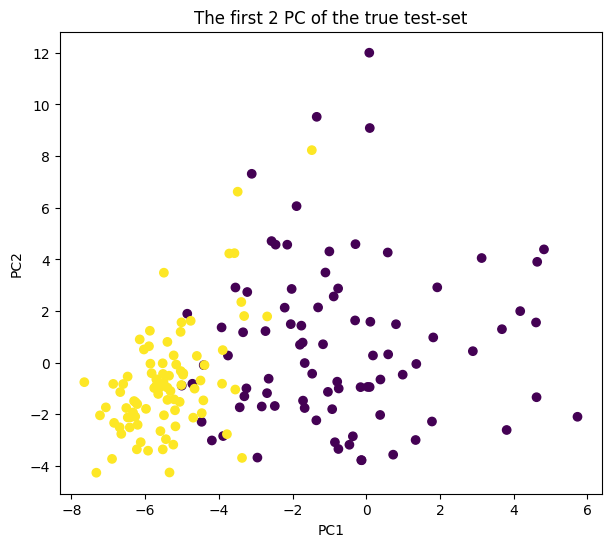

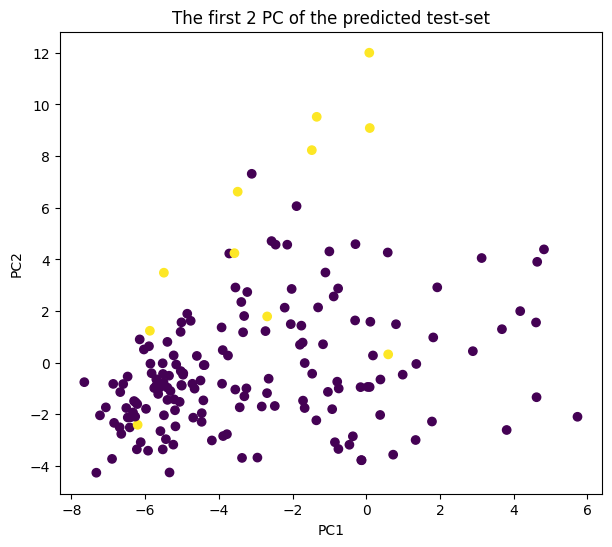

Confusion Matrix:



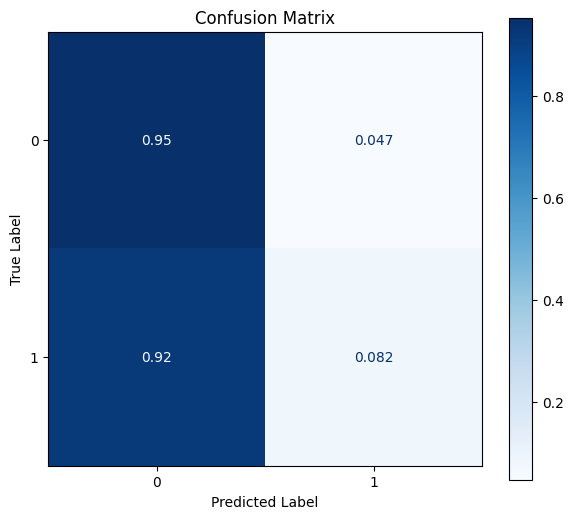

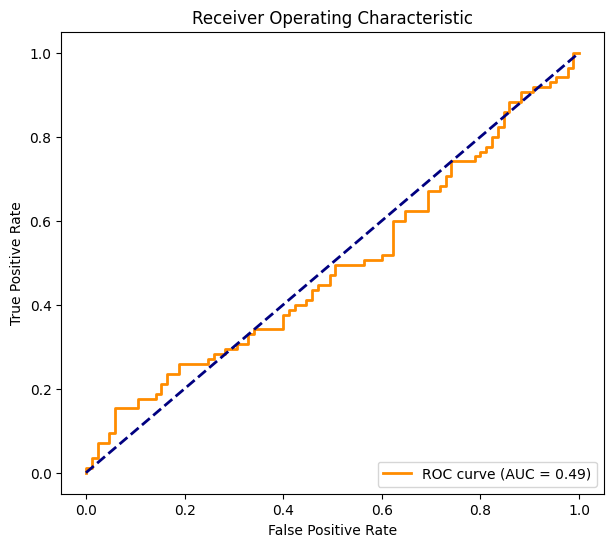



AUC-ROC: 0.4909
Accuracy: 0.5176
F1 Score: 0.1458
Precision: 0.6364
Recall: 0.0824
0.14583333333333331


In [512]:
# PCA
function_AD('pca', X_train, y_train, X_test, y_test)

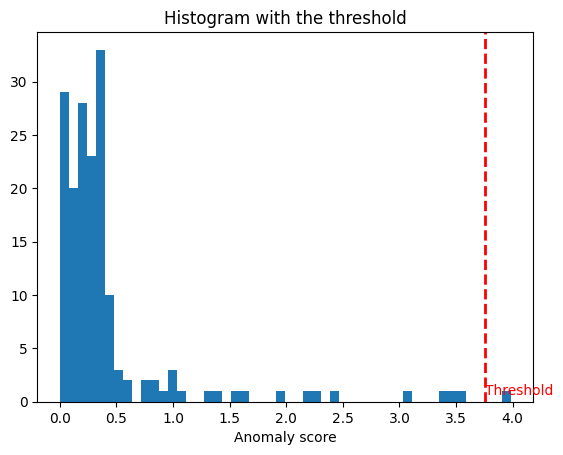

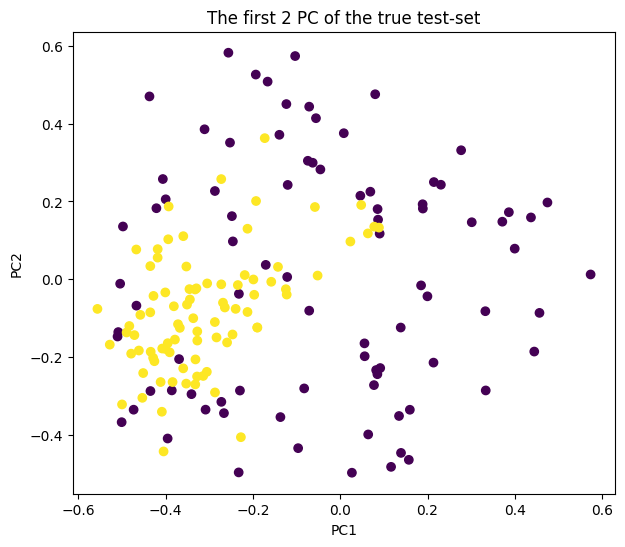

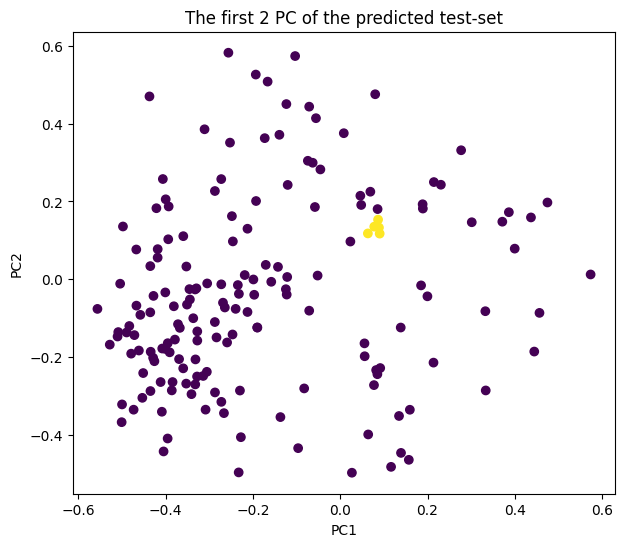

Confusion Matrix:



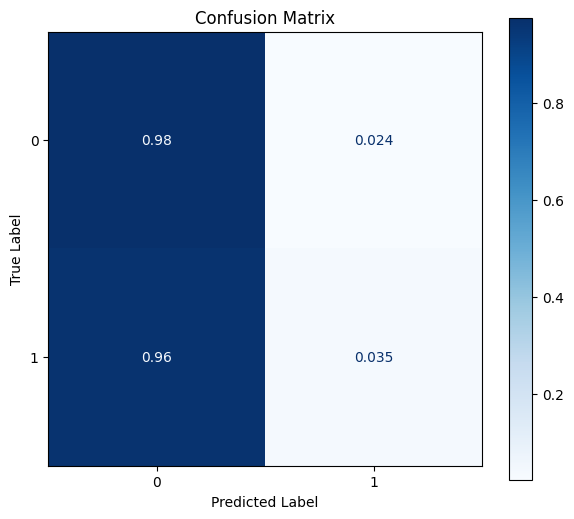

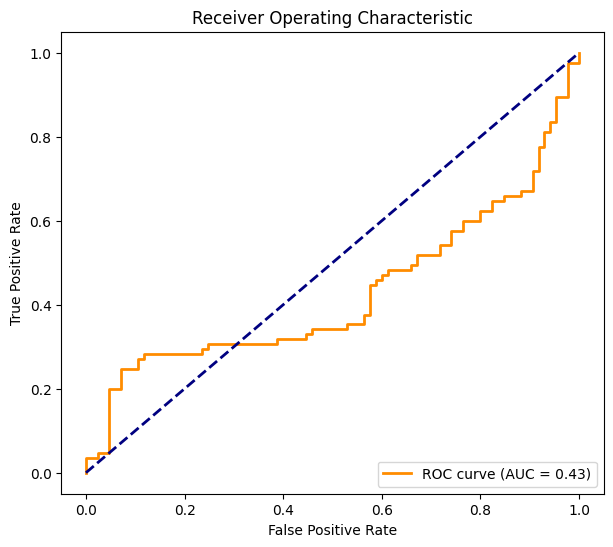



AUC-ROC: 0.4284
Accuracy: 0.5059
F1 Score: 0.0667
Precision: 0.6000
Recall: 0.0353
0.06666666666666667


In [513]:
# KPCA
function_AD('kpca', X_train, y_train, X_test, y_test)

### **NOT_** KERNEL ANALYSIS with THE OPTIMUM threshold for the best F1 score

kernel: cosine, gamma: 0.001

AUC:  0.5701038062283736  and f1:  0.022727272727272728
n:  2

Best AUC:  0.5701038062283736

Best F1:  0.022727272727272728

optimum_kernel:  cosine

optimum_n_components:  2

optimum_gamma:  0.001
kernel: cosine, gamma: 0.01

AUC:  0.5701038062283736  and f1:  0.022727272727272728
n:  2
kernel: cosine, gamma: 0.1

AUC:  0.5701038062283736  and f1:  0.022727272727272728
n:  2
kernel: cosine, gamma: 10

AUC:  0.5701038062283736  and f1:  0.022727272727272728
n:  2
kernel: cosine, gamma: 0.001

AUC:  0.5701038062283736  and f1:  0.022727272727272728
n:  4
kernel: cosine, gamma: 0.01

AUC:  0.5701038062283736  and f1:  0.022727272727272728
n:  4
kernel: cosine, gamma: 0.1

AUC:  0.5701038062283736  and f1:  0.022727272727272728
n:  4
kernel: cosine, gamma: 10

AUC:  0.5701038062283736  and f1:  0.022727272727272728
n:  4
kernel: cosine, gamma: 0.001

AUC:  0.5701038062283736  and f1:  0.022727272727272728
n:  6
kernel: cosine, gamma: 0.01

AUC:  0.5701038062

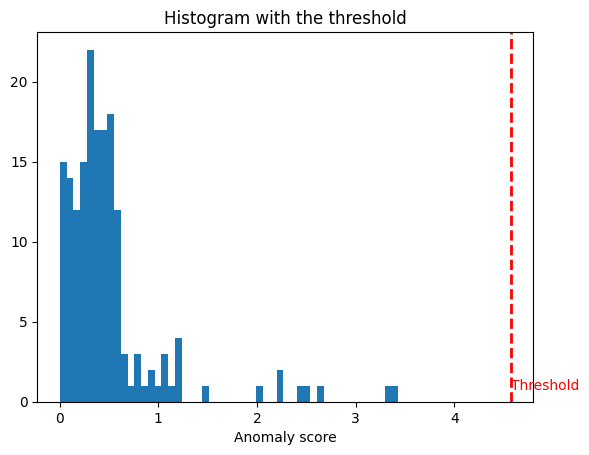

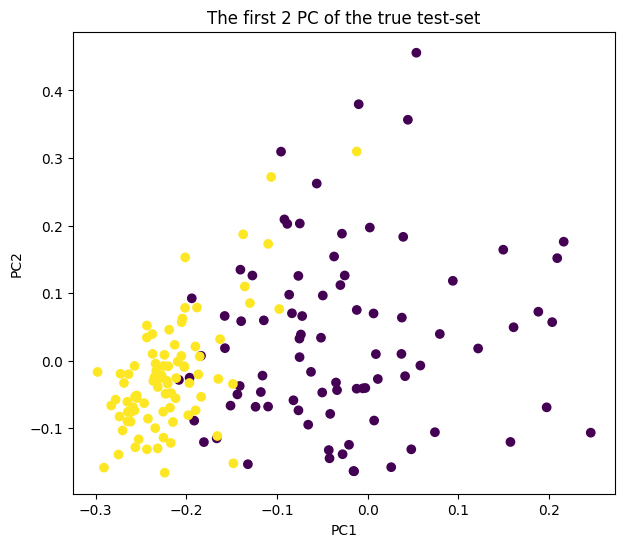

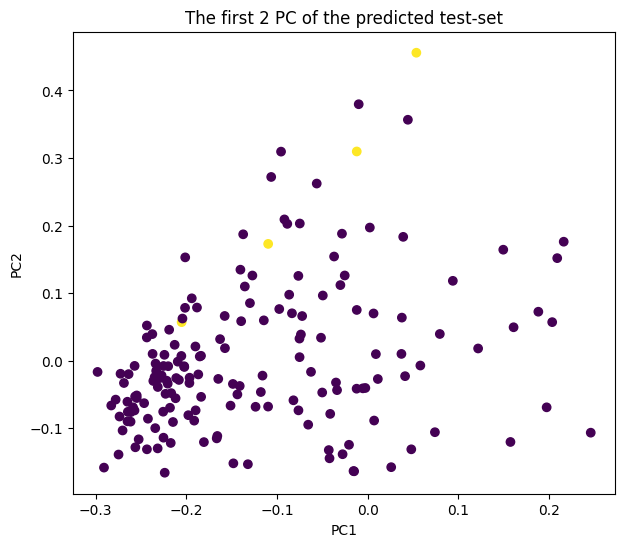

Confusion Matrix:



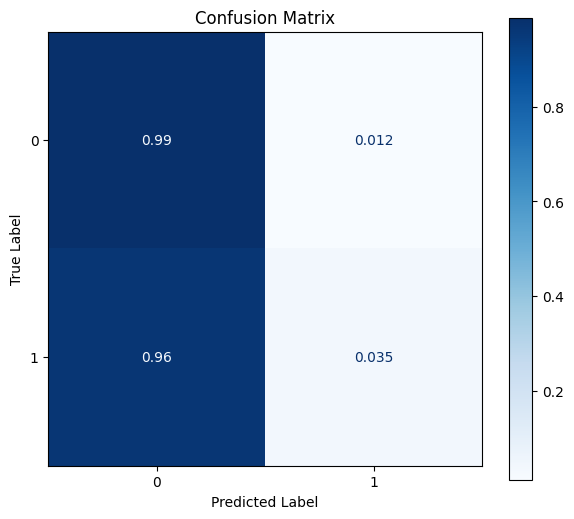

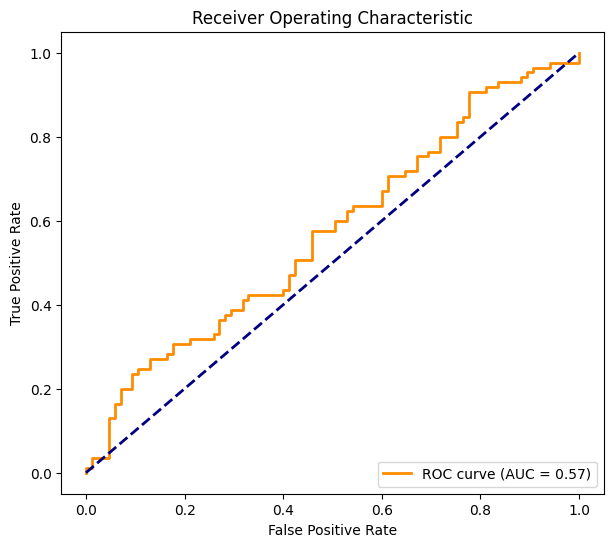



AUC-ROC: 0.5722
Accuracy: 0.5118
F1 Score: 0.0674
Precision: 0.7500
Recall: 0.0353
0.06741573033707865


In [514]:
# Best gamma and number of components for PCA:
best_auc = 0.0
best_f1 = 0.0
optimum_gamma = 0.0
optimum_kernel = ''
# optimum_degree = 0
# optimum_coef0 = 0
optimum_n_components = 0

kernels = [
          'cosine', 
           'rbf' 
          #,'sigmoid'
          #,'poly'
           ]

gammas = [0.001, 0.01, 0.1, 10]
degrees = [1, 2, 3]
coef0s = [1, 2]
nn_components = np.arange(2, 101, 2)

auc_values = [[] for _ in range(len(gammas))]

for kernel in kernels:
  for n_components in nn_components:
    for gamma_idx, gamma in enumerate(gammas):
      # for degree in degrees:
      #   for coef0 in coef0s:
          print(f'kernel: {kernel}, gamma: {gamma}')
    
          new_auc, new_f1 = function_AD('kpca', X_train, y_train, X_test, y_test 
                                        ,n_components=n_components
                                        ,analysis=True
                                        ,kernel=kernel
                                        ,gamma=gamma
                                        # ,degree=degree
                                        # ,coef0=coef0
                                        # ,contamination=-1
                                        )
          print("\nAUC: ", new_auc," and f1: ", new_f1)
          auc_values[gamma_idx].append(new_auc)
          print("n: ", n_components)
          # if  new_f1 > best_f1:
          if best_f1 < new_f1 and new_auc > best_auc-0.1:
              best_auc = new_auc
              best_f1 = new_f1
              optimum_gamma = gamma
              optimum_kernel = kernel
              # optimum_degree = degree
              # optimum_coef0 = coef0
              optimum_n_components = n_components
              print("=====================")
              print("\nBest AUC: ", best_auc)
              print("\nBest F1: ", best_f1)
              print("\noptimum_kernel: ", optimum_kernel)
              print("\noptimum_n_components: ", optimum_n_components)
              print("\noptimum_gamma: ", optimum_gamma)
              # print("\noptimum_degree: ", optimum_degree)
              # print("\noptimum_coef0: ", optimum_coef0)
              print("=====================")

print("=====================")
print("\nBest AUC: ", best_auc)
print("\nBest F1: ", best_f1)
print("\noptimum_kernel: ", optimum_kernel)
print("\noptimum_n_components: ", optimum_n_components)
print("\noptimum_gamma: ", optimum_gamma)
# print("\noptimum_degree: ", optimum_degree)
# print("\noptimum_coef0: ", optimum_coef0)
print("=====================")

# for gamma_idx, gamma in enumerate(gammas):
#     plt.plot(nn_components, auc_values[gamma_idx], label='gamma='+str(gamma))
    
# plt.xlabel('Number of Components')
# plt.ylabel('AUC')
# plt.legend()
# plt.show()




new_auc = function_AD('kpca', X_train, y_train, X_test, y_test, 
                      n_components=optimum_n_components, 
                      kernel=optimum_kernel, 
                      gamma=optimum_gamma, 
                      # degree=optimum_degree, 
                      # coef0=optimum_coef0,
                      # contamination=-1
                      )

### **Park's Kernel Analysis in order to get the best AUC when finding the optimum parameter gamma**

In [515]:
X = breast_cancer_df.iloc[:, :-1].values
X = scaler.fit_transform(X)
y = breast_cancer_df.iloc[:, -1].values

In [516]:
# FOR ALL CLASSES: Return AUC
#Kernel_PCA_AUC(X, y)

# FOR ALL CLASSES: Find the optimum gamma for the best AUC
Kernel_PCA_AUC(X, y, kernel_analysis=True)

# FOR Class: 0 : Return AUC
#Kernel_PCA_AUC(X, y)

# For Class: 0 : Find the optimum gamma for the best AUC
#Kernel_PCA_AUC(X, y, kernel_analysis=True)


All different classes:  [0 1]

Number of classes:  2

For the class:  0

Optimum gamma:  2.987517923308969

Best AUC:  0.9859383450513791

For the class:  1

Optimum gamma:  2.987517923308969

Best AUC:  0.9899691358024691
